# Modelagem Supervisionada para Predição de Pagamento de Mensalidades

## 1. Introdução

O presente projeto tem como objetivo **construir um modelo preditivo capaz de estimar a probabilidade de pagamento de uma mensalidade por parte de um aluno após a realização de uma ação de cobrança**.  

Esse cenário simula uma situação comum enfrentada por empresas responsáveis pela gestão e execução de cobranças para instituições de ensino, onde o atraso ou a inadimplência no pagamento de mensalidades representa um desafio significativo para a sustentabilidade financeira das operações.

Diante disso, a ideia é utilizar técnicas de ciência de dados e aprendizado de máquina para transformar o histórico de mensalidades e ações de cobrança em um modelo que auxilie na tomada de decisão, indicando, após cada nova ação, qual a chance real de o aluno efetuar o pagamento.  

Essa estimativa permite à empresa:
- Priorizar os casos com maior risco de inadimplência;
- Evitar ações de cobrança desnecessárias com alunos que provavelmente pagarão;
- Otimizar recursos, alocando esforços de forma mais estratégica e eficiente.

Ao longo do projeto, foram explorados dois enfoques complementares:
- Prever quem irá pagar após a cobrança (classe 1);
- Prever quem continuará inadimplente (classe 0), permitindo a atuação preventiva.

O projeto inclui análise exploratória, tratamento de dados, criação de features, avaliação de diferentes modelos de classificação e comparação com base em métricas apropriadas, buscando oferecer uma solução confiável, interpretável e aplicável ao contexto real da empresa.

## 2. Carregamento e Inspeção dos Dados

### 2.1. Carregamento dos dados

In [1]:
# Importa as bibliotecas necessárias para essa seção
import numpy as np
import pandas as pd

# Carrega os dados
df_mensalidades = pd.read_csv('../dados/mensalidades_teste.csv')
df_cobrancas = pd.read_csv('../dados/cobrancas_teste.csv')


In [2]:
# Exibe as primeiras 10 linhas do DataFrame df_mensalidades
df_mensalidades.head(10)

,id_aluno,id_ies,id_curso,data_competencia,data_vencimento,valor_cobrado,data_baixa
0,365223471480833,24597374125586264413,625322,2025-02-01,2025-02-28,1040.50,NaN
1,574815890571275,24597374125586264413,427325,2024-03-01,2024-03-30,563.88,2024-03-05
2,574815890571275,24597374125586264413,427325,2024-04-01,2024-04-30,563.88,2024-04-05
3,574815890571275,24597374125586264413,427325,2024-05-01,2024-05-30,563.88,2024-05-07
4,574815890571275,24597374125586264413,427325,2024-06-01,2024-06-30,563.88,2024-06-03
5,574815890571275,24597374125586264413,427325,2024-08-01,2024-08-30,563.88,2024-08-07
6,574815890571275,24597374125586264413,427325,2024-09-01,2024-09-30,563.88,2024-09-04
7,574815890571275,24597374125586264413,427325,2024-10-01,2024-10-30,563.88,2024-10-01
8,574815890571275,24597374125586264413,427325,2024-11-01,2024-11-30,563.88,2024-11-04
9,574815890571275,24597374125586264413,427325,2024-12-01,2024-12-30,563.88,2024-12-02


In [3]:
# Exibe as primeiras 10 linhas do DataFrame df_cobrancas
df_cobrancas.head(10)

,id,acao_cobranca,id_aluno,data_cobranca
0,3,SMS,100016589948222,2025-02-04
1,4,whatsapp,100016589948222,2025-02-05
2,5,e-mail,100016589948222,2025-02-07
3,6,ligação telefônica,100016589948222,2025-02-11
4,7,e-mail,100016589948222,2025-02-12
5,8,ligação telefônica,100016589948222,2025-02-15
6,9,ligação telefônica,100016589948222,2025-02-25
7,10,whatsapp,100016589948222,2025-03-07
8,11,negativação,100016589948222,2025-04-06
9,34,e-mail,100057233842444,2024-02-21


### 2.2. Inspeção inicial

In [4]:
# Exibe o número de linhas de cada DataFrame
for name, df in zip(['df_mensalidades', 'df_cobrancas'], [df_mensalidades, df_cobrancas]):
    print(f"O número de linhas do DataFrame {name} é: {df.shape[0]}.")

O número de linhas do DataFrame df_mensalidades é: 200000.
O número de linhas do DataFrame df_cobrancas é: 810421.


In [5]:
# Verifica informações sobre os dados de 'df_mensalidades' 
df_mensalidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_aluno          200000 non-null  int64  
 1   id_ies            200000 non-null  object 
 2   id_curso          200000 non-null  int64  
 3   data_competencia  200000 non-null  object 
 4   data_vencimento   200000 non-null  object 
 5   valor_cobrado     200000 non-null  float64
 6   data_baixa        155383 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 10.7+ MB


In [6]:
# Verifica informações sobre os dados de 'df_cobrancas' 
df_cobrancas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810421 entries, 0 to 810420
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             810421 non-null  int64 
 1   acao_cobranca  810421 non-null  object
 2   id_aluno       810421 non-null  int64 
 3   data_cobranca  810421 non-null  object
dtypes: int64(2), object(2)
memory usage: 24.7+ MB


### 2.3. Verificação de valores nulos nos DataFrames

In [7]:
# Verifica a presença de valores nulos em 'df_mensalidades'
df_mensalidades.isnull().sum()

id_aluno                0
id_ies                  0
id_curso                0
data_competencia        0
data_vencimento         0
valor_cobrado           0
data_baixa          44617
dtype: int64

In [8]:
# Verifica a presença de valores nulos em 'df_cobrancas'
df_cobrancas.isnull().sum()

id               0
acao_cobranca    0
id_aluno         0
data_cobranca    0
dtype: int64

Em relação ao dataframe `df_mensalidades`, a coluna `data_baixa` é a única que apresenta valores nulos, o que é esperado, uma vez que a ausência dessa data indica que o pagamento da mensalidade ainda não foi realizado. Esses valores serão utilizados para identificar inadimplência e gerar a variável-alvo do modelo.  

Para o dataframe `df_cobranca`, nenhuma coluna apresenta valores nulos, o que indica que todas as ações de cobrança possuem os campos obrigatórios corretamente preenchidos, como o tipo de ação, data e o ID do aluno.

### 2.4. Conversão de datas e criação de colunas de pagamento

É necessário que façamos a conversão das datas para o tipo `datatime`, do `pandas`, para que possamos realizar operações com essas datas.  

Após essa conversão, criamos colunas auxiliares que identificam se a mensalidasde foi paga (`status_pagamento`), e uma versão binária (`foi_pago`), que será utilizada como variável-alvo do modelo preditivo.

In [9]:
# Converte as colunas de data de ambos os DataFrames para o format datetime do pandas, para facilitar a análise temporal
for data_col in ['data_competencia', 'data_vencimento', 'data_baixa']:
    df_mensalidades[data_col] = pd.to_datetime(df_mensalidades[data_col], errors = 'coerce')

# Converte a coluna de data de cobrança no DataFrame df_cobrancas
df_cobrancas['data_cobranca'] = pd.to_datetime(df_cobrancas['data_cobranca'], errors = 'coerce')

In [10]:
# Cria a coluna 'status_pagamento', para a identificar se a mensalidade foi paga ou não
df_mensalidades['status_pagamento'] = np.where(df_mensalidades['data_baixa'].isna(), 'não paga', 'paga')

# Cria a coluna 'foi_pago', binária, que servirá como alvo para o modelo preditivo, a partir da coluna 'status_pagamento'
df_mensalidades['foi_pago'] = df_mensalidades['status_pagamento'].map({'paga': 1, 'não paga': 0})

In [11]:
# Exibe as primeiras 5 linhas do DataFrame df_mensalidades após a criação das colunas 'status_pagamento' e 'foi_pago'
df_mensalidades.head()

,id_aluno,id_ies,id_curso,data_competencia,data_vencimento,valor_cobrado,data_baixa,status_pagamento,foi_pago
0,365223471480833,24597374125586264413,625322,2025-02-01,2025-02-28,1040.50,NaT,não paga,0
1,574815890571275,24597374125586264413,427325,2024-03-01,2024-03-30,563.88,2024-03-05,paga,1
2,574815890571275,24597374125586264413,427325,2024-04-01,2024-04-30,563.88,2024-04-05,paga,1
3,574815890571275,24597374125586264413,427325,2024-05-01,2024-05-30,563.88,2024-05-07,paga,1
4,574815890571275,24597374125586264413,427325,2024-06-01,2024-06-30,563.88,2024-06-03,paga,1


As colunas `status_pagamento` e `foi_pago` foram corretamente atribuídas, com base na presença ou ausência da data de baixa.  
A coluna `status_pagamento` será utilizadas para análises e relatórios, uma vez que é categórica. Já a coluna `foi_pago`, conforme mencionado anteriormente, será utilizada como variável-alvo do modelo preditivo, por ser binária e compatível com algoritmos de classificação. 

### 2.5. Análise de duplicatas

In [12]:
# Contabiliza o número de entradas duplicadas no DataFrame df_mensalidades
df_mensalidades.duplicated().value_counts()

False    200000
Name: count, dtype: int64

In [13]:
# Contabiliza o número de entradas duplicadas no DataFrame df_cobrancas
df_cobrancas.duplicated().value_counts()

False    810421
Name: count, dtype: int64

Como podemos observar, ambos os DataFrames **não** apresentam duplicatas, o que é um ótimo sinal, pois indica que não há registros repetidos.  
Esta verificação é fundamental, já que duplicatas podem levar a análises incorretas, conclusões enviesadas e ainda impactar negativamente o desempenho do modelo preditivo.

## 3. Associação Entre Ações de Cobrança e Mensalidades

Nesta seção, associamos cada ação de cobrança presente no DataFrame `df_cobranca` a uma mensalidade específica do mesmo aluno presente em `df_mensalidades`.  

Observamos que os dados fornecidos não possuem, de início, uma relação clara entre as ações de cobrança e as mensalidades. Com efeito, a única coluna em comum entre ambos os  
DataFrames é a coluna `id_aluno`. No entanto, como um único aluno pode ter várias mensalidades, e cada mensalidade pode ter várias ações de cobrança associadas, não é possível  
inferir, com exatidão, qual ação de cobrança está relacionada a qual mensalidade. 

Além disso, o DataFrame `df_cobranca` não possui nenhuma referência direta à mensalidade, como `data_competencia` e `data_vencimento`, o que torna complexa a associação entre os dois DataFrames. Por essa razão, adotamos uma abordagem baseada em filtragem temporal, na qual consideramos como associação a mensalidade cujo vencimento esteja mais próximo da data da ação de cobrança, dentro de uma janela de 10 dias.

Após essa associação, criamos um novo DataFrame, `df_cobranca_mensalidade`, no qual cada linha representa uma ação de cobrança associada a uma mensalidade, incluindo
- O tipo de ação de cobrança (`acao_cobranca`);
- A data da ação de cobrança (`data_cobranca`);
- A data de vencimento da mensalidade (`data_vencimento`);
- A variável alvo `foi_pago`, herdada do DataFrame `df_mensalidades`, que indica se a mensalidade foi paga ou não.

### 3.1. Criação de identificador por mensalidade

In [14]:
# Cria a coluna 'id_mensalidade' no DataFrame df_mensalidades, que será um identificador único para cada mensalidade
# A coluna é criada com base no agrupamento por 'id_aluno' e um contador cumulativo, para garantir que cada mensalidade tenha um ID único
df_mensalidades['id_mensalidade'] = df_mensalidades.groupby('id_aluno').cumcount()

In [15]:
# Exibe as primeiras 10 linhas do DataFrame df_mensalidades após a criação da coluna 'id_mensalidade'
df_mensalidades.head(10)

,id_aluno,id_ies,id_curso,data_competencia,data_vencimento,valor_cobrado,data_baixa,status_pagamento,foi_pago,id_mensalidade
0,365223471480833,24597374125586264413,625322,2025-02-01,2025-02-28,1040.50,NaT,não paga,0,0
1,574815890571275,24597374125586264413,427325,2024-03-01,2024-03-30,563.88,2024-03-05,paga,1,0
2,574815890571275,24597374125586264413,427325,2024-04-01,2024-04-30,563.88,2024-04-05,paga,1,1
3,574815890571275,24597374125586264413,427325,2024-05-01,2024-05-30,563.88,2024-05-07,paga,1,2
4,574815890571275,24597374125586264413,427325,2024-06-01,2024-06-30,563.88,2024-06-03,paga,1,3
5,574815890571275,24597374125586264413,427325,2024-08-01,2024-08-30,563.88,2024-08-07,paga,1,4
6,574815890571275,24597374125586264413,427325,2024-09-01,2024-09-30,563.88,2024-09-04,paga,1,5
7,574815890571275,24597374125586264413,427325,2024-10-01,2024-10-30,563.88,2024-10-01,paga,1,6
8,574815890571275,24597374125586264413,427325,2024-11-01,2024-11-30,563.88,2024-11-04,paga,1,7
9,574815890571275,24597374125586264413,427325,2024-12-01,2024-12-30,563.88,2024-12-02,paga,1,8


### 3.2. Seleção de colunas para o merge

In [16]:
# Seleciona as colunas de ambos os DataFrames que serão utilizadas na junção
# Colunas redundantes como 'data_baixa' e 'status_pagamento', que essencialmente trazem a mesma informação de 'foi_pago', foram deixadas de fora
# A coluna 'data_competencia' também foi excluída, pois não é relevante para a análise de ações de cobrança
mensalidades_base = df_mensalidades[['id_aluno', 'data_vencimento', 'foi_pago', 'id_mensalidade']]
cobrancas_base = df_cobrancas[['id_aluno', 'data_cobranca', 'acao_cobranca']]

### 3.3. Merge (inner join) entre os DataFrames

In [17]:
# Executa a junção entre os DataFrames definidos acima, 'mensalidades_base' e 'cobrancas_base', utilizando a coluna 'id_aluno' como chave da junção
df_merged = pd.merge(mensalidades_base, cobrancas_base, on = 'id_aluno', how = 'inner')

In [18]:
# Exibe as primeiras 15 linhas do DataFrame df_merged
df_merged.head(n = 15)

,id_aluno,data_vencimento,foi_pago,id_mensalidade,data_cobranca,acao_cobranca
0,365223471480833,2025-02-28,0,0,2025-02-21,e-mail
1,365223471480833,2025-02-28,0,0,2025-02-23,whatsapp
2,365223471480833,2025-02-28,0,0,2025-02-27,SMS
3,365223471480833,2025-02-28,0,0,2025-02-28,whatsapp
4,365223471480833,2025-02-28,0,0,2025-03-02,e-mail
5,365223471480833,2025-02-28,0,0,2025-03-06,ligação telefônica
6,365223471480833,2025-02-28,0,0,2025-03-07,e-mail
7,365223471480833,2025-02-28,0,0,2025-03-10,ligação telefônica
8,365223471480833,2025-02-28,0,0,2025-03-20,ligação telefônica
9,365223471480833,2025-02-28,0,0,2025-03-30,whatsapp


### 3.4. Filtragem temporal

In [19]:
# Define uma janela de 10 dias para filtrar as ações de cobrança que ocorreram próximas da data de vencimento da mensalidade
janela_cobranca = pd.Timedelta(days = 10)

# Filtra ações de cobrança que ocorreram até 10 dias antes ou depois do vencimento da mensalidade
df_merged = df_merged[
    (df_merged['data_cobranca'] <= df_merged['data_vencimento'] + janela_cobranca)
    ]

# Calcula a diferença entre a data de vencimento e a data da cobrança
df_merged['diferenca_data'] = (df_merged['data_cobranca'] - df_merged['data_vencimento']).abs()

### 3.5. Seleção da mensalidade mais próxima para cada ação de cobrança

In [20]:
# Ordena o DataFrame df_merged em pelo valor absoluto entre a data de vencimento e a data da cobrança
df_merged = df_merged.sort_values(by = 'diferenca_data') 

# Para cada ação de cobrança (mesmo aluno, mesma data e tipo), mantém apenas a mensalidade mais próxima
df_acoes_mensalidade = df_merged.drop_duplicates(subset = ['id_aluno', 'data_cobranca', 'acao_cobranca'])

In [21]:
df_merged

,id_aluno,data_vencimento,foi_pago,id_mensalidade,data_cobranca,acao_cobranca,diferenca_data
2002602,157325456940964,2024-05-31,1,0,2024-05-31,e-mail,0 days
2169925,383382048060358,2024-11-15,0,2,2024-11-15,e-mail,0 days
3139598,349851718114465,2024-10-10,0,7,2024-10-10,e-mail,0 days
2169863,383382048060358,2024-08-15,0,1,2024-08-15,e-mail,0 days
3989977,761445812945974,2024-04-05,1,0,2024-04-05,e-mail,0 days
...,...,...,...,...,...,...,...
3813156,902411045181700,2025-02-20,0,12,2024-01-07,whatsapp,410 days
2557210,188262679954548,2025-02-20,0,2,2024-01-07,whatsapp,410 days
3620991,573959812282155,2025-02-20,1,9,2024-01-03,e-mail,414 days
2557209,188262679954548,2025-02-20,0,2,2024-01-01,e-mail,416 days


## 4. Análise Exploratória dos Dados

Nesta seção, realizamos uma análise exploratória dos dados, no intuito de melhor compreender as variáveis que compõem o DataFrame `df_cobranca_mensalidade`, bem como as relações existentes entre elas, em especial com a variável alvo `foi_pago`. 

Foram analisadas as distribuição dos pagamentos, a eficácia relativa de cada ação de cobrança e a influência do tempo entre a ação e o vencimento da mensalidade. As análises mostraram que fatores como o tipo de cobrança e o momento em que ela é realizada estão diretamente relacionados à probabilidade de pagamento.  

As conclusões obtidas nesta etapa servirão como base para a seleção e transformação das variáveis que serão utilizadas na modelagem preditiva.

In [22]:
# Importa as bibliotecas necessárias para essa seção, para visualizações e análises estísticas
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1. Estatísticas descritivas

Abaixo, apresentamos as estatísticas descritivas da variável-alvo binária `foi_pago` e da variável temporal `diferenca_data`:

- Aproximadamente **56%** das ações de cobrança estão associadas a mensalidades que foram pagas, indicando uma leve predominância de pagamentos;
- A mediana de `diferenca_data` é de 3 dias, o que indica que, em pelo menos 50% dos casos, a ação de cobrança ocorreu com até 3 dias da data de vencimento (antes ou depois);
- 75% das ações ocorrem a até 7 dias do vencimento da mensalidade;
- O valor máximo de 346 dias para `diferenca_data` sugere a presença de ações extremamente distantes no tempo, que poderão ser interpretadas como outliers na análise preditiva.

In [23]:
# Exibe as estatísticas descritivas acerca das variáveis de interesse 'foi_pago' e 'diferenca_data'
df_acoes_mensalidade[['foi_pago', 'diferenca_data']].describe()

,foi_pago,diferenca_data
count,745931.000000,745931
mean,0.561237,4 days 04:15:23.055885866
std,0.496236,5 days 07:42:18.127719588
min,0.000000,0 days 00:00:00
25%,0.000000,1 days 00:00:00
50%,1.000000,3 days 00:00:00
75%,1.000000,7 days 00:00:00
max,1.000000,346 days 00:00:00


O gráfico de barras abaixo mostra a frequência absoluta de casos pagos e não pagos (`foi_pago`), segmentados por tipo de ação de cobrança (acao_cobranca).  
Essa segmentação nos ajuda a identificar quais ações estão mais associadas a pagamentos efetivos.

In [24]:
# Frequência absoluta da variável-alvo 'foi_pago'
df_acoes_mensalidade['foi_pago'].value_counts()

foi_pago
1    418644
0    327287
Name: count, dtype: int64

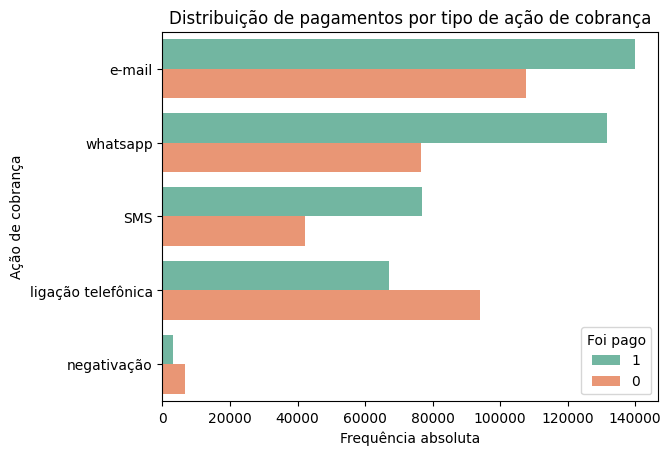

In [25]:
# Exibe o gráfico de barras empilhadas (por categoria) que mostra a frequência absoluta de pagamentos ('foi_pago')
sns.countplot(data = df_acoes_mensalidade, y = 'acao_cobranca', hue = 'foi_pago', hue_order = [1, 0], palette = 'Set2')
plt.title('Distribuição de pagamentos por tipo de ação de cobrança')
plt.xlabel('Frequência absoluta')
plt.ylabel('Ação de cobrança')
plt.legend(title = 'Foi pago')
plt.show()

À luz do gráfico acima, observa-se que e-mail e WhatsApp foram as ações de cobrança mais utilizadas, ambas associadas a uma quantidade expressiva tanto de pagamentos quanto de não pagamentos. O SMS, embora menos frequente, apresenta um número considerável de ações e já indica bom desempenho visualmente.  

A ligação telefônica e a negativação, por serem abordagens mais formais e potencialmente mais invasivas, mostram menor volume de uso e, à primeira vista, parecem estar mais associadas aos casos de inadimplência.  

Entretanto, como o gráfico utiliza frequência absoluta, ele não permite concluir diretamente qual ação foi mais eficaz em gerar pagamentos, pois não considera as proporções relativas  
dentro de cada tipo de ação. Por esse motivo, será conduzida na próxima subseção uma análise específica focada em taxas de sucesso (eficácia relativa) por tipo de ação.

### 4.2. Eficácia das ações de cobrança

O objetivo dessa subseção é estimar a eficácia (taxa média de pagamento) de cada tipo de ação de cobrança registrada na variável `acao_cobranca`, em relação à variável-alvo `foi_pago`.

Enquanto a análise anterior apresentou a distribuição absoluta de pagamentos e não pagamentos por tipo de ação, aqui buscamos responder à seguinte pergunta:
“Qual a chance de uma mensalidade ser paga, dado que uma ação de cobrança foi realizada?”

Para isso, calculamos a proporção de mensalidades pagas para cada tipo de ação de cobrança, utilizando a média da variável binária `foi_pago` (em que 1 representa pagamento e 0 representa inadimplência). Essa métrica nos permite comparar objetivamente a **eficácia relativa** das diferentes estratégias de cobrança. Essa métrica nos permite comparar de forma objetiva a eficácia relativa das diferentes estratégias de cobrança.

In [26]:
# Calcula a média de pagamento ('foi_pago') para cada tipo de ação de cobrança ('acao_cobranca'), e ordena os resultados em ordem decrescente
pagamento_por_acao = df_acoes_mensalidade.groupby('acao_cobranca')['foi_pago'].mean().sort_values(ascending = False)

In [27]:
# Exibe o resultado do agrupamento, como uma série do pandas
pagamento_por_acao

acao_cobranca
SMS                   0.645530
whatsapp              0.632427
e-mail                0.564797
ligação telefônica    0.416093
negativação           0.324394
Name: foi_pago, dtype: float64

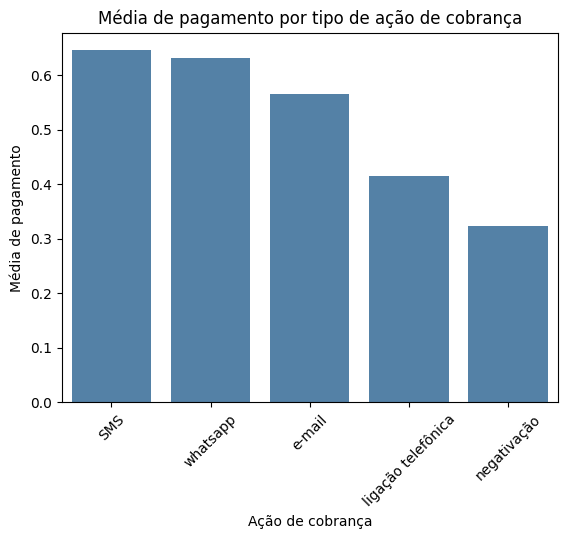

In [28]:
# Cria um DataFrame a partir da série de pagamento por ação, para facilitar a manipulação e visualização dos dados
df_pagamento_por_acao = pagamento_por_acao.reset_index()

# Exibe o gráfico de barras que exibe a proporção média de mensalidades pagas ('foi_pago') para cada ação de cobrança ('acao_cobranca')
sns.barplot(data = df_pagamento_por_acao, x = 'acao_cobranca', y = 'foi_pago', color = 'steelblue')
plt.title('Média de pagamento por tipo de ação de cobrança')
plt.xlabel('Ação de cobrança')
plt.ylabel('Média de pagamento')
plt.xticks(rotation = 45)
plt.show()

Com base no gráfico de barras acima, inferimos que ações de cobrança "rápidas", como SMS (64,5%) e WhatsApp (63,2%), estão associadas a maiores taxas de pagamento. O e-mail, com 56,5%, também apresenta um desempenho positivo, mas ligeiramente inferior ao das ações digitais mais rápidas, embora o gráfico anterior tenha sugerido que o e-mail seria a ação de cobrança com maior taxa de pagamento. Por outro lado, ações mais formais ou intrusivas, como ligações telefônicas (41,5%) e negativação (32,4%), apresentam taxas de pagamento significativamente inferiores. 

O gráfico representa a média da variável-alvo `foi_pago` para cada tipo de ação, servindo como uma estimativa da eficácia relativa de cada estratégia. Esse resultado evidencia que ações realizadas de forma simples, com linguagem objetiva e por canais amplamente aceitos, tendem a ser mais eficazes.

### 4.3. Impacto do tempo na eficácia da cobrança

In [29]:
# Define a coluna 'dias_dif' como a diferença absoluta, em dias, entre a data de cobrança e a data de vencimento
# Necessário .loc para evitar o SettingWithCopyWarning do pandas
df_acoes_mensalidade.loc[:, 'dias_dif'] = df_acoes_mensalidade['diferenca_data'].dt.days

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\2682239758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acoes_mensalidade.loc[:, 'dias_dif'] = df_acoes_mensalidade['diferenca_data'].dt.days


In [30]:
# Exibe o dataframe df_acoes_mensalidade
df_acoes_mensalidade

,id_aluno,data_vencimento,foi_pago,id_mensalidade,data_cobranca,acao_cobranca,diferenca_data,dias_dif
2002602,157325456940964,2024-05-31,1,0,2024-05-31,e-mail,0 days,0
2169925,383382048060358,2024-11-15,0,2,2024-11-15,e-mail,0 days,0
3139598,349851718114465,2024-10-10,0,7,2024-10-10,e-mail,0 days,0
2169863,383382048060358,2024-08-15,0,1,2024-08-15,e-mail,0 days,0
3989977,761445812945974,2024-04-05,1,0,2024-04-05,e-mail,0 days,0
...,...,...,...,...,...,...,...,...
3485725,164908127873678,2025-02-05,0,2,2024-05-05,negativação,276 days,276
3213101,909729255251935,2025-02-23,0,2,2024-05-05,negativação,294 days,294
250822,135803604319333,2025-02-05,0,0,2024-03-21,negativação,321 days,321
2026556,840092230459849,2025-02-14,0,1,2024-03-06,negativação,345 days,345


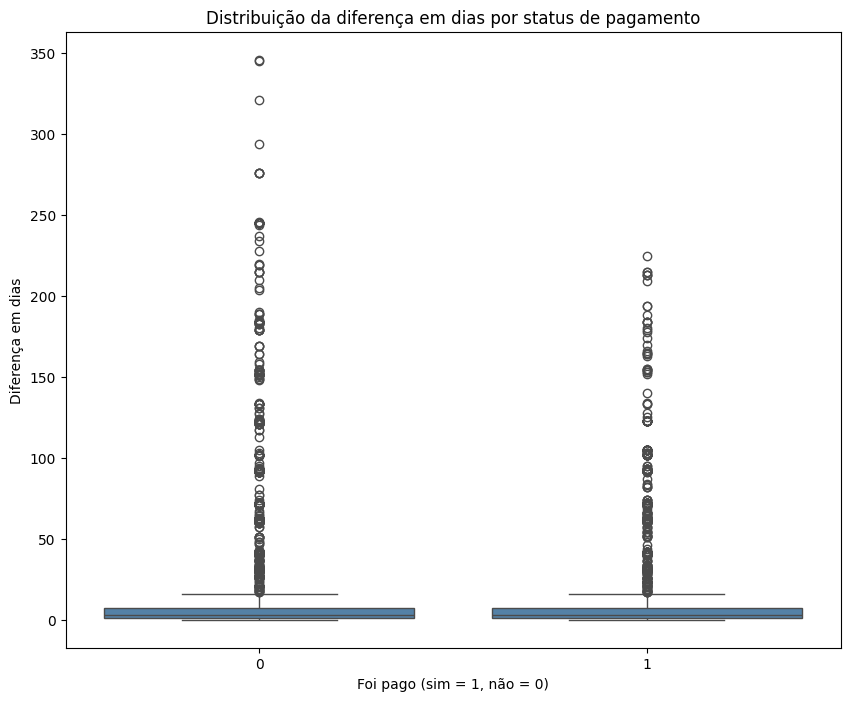

In [31]:
# Exibe o boxplot da distribuição da diferença em dias entre a data de cobrança e a data de vencimento, por status de pagamento ('foi_pago')
plt.figure(figsize = (10, 8))
sns.boxplot(data = df_acoes_mensalidade, x = 'foi_pago', y = 'dias_dif', color = 'steelblue')
plt.title('Distribuição da diferença em dias por status de pagamento')
plt.xlabel('Foi pago (sim = 1, não = 0)')
plt.ylabel('Diferença em dias')
plt.show()

Observa-se que o grupo de inadimplência (`foi_pago` = 0) apresenta maior quantidade de possíveis outliers, indicando que cobranças feitas muito tempo após o vencimento da mensalidade tendem ser menos eficazes. Em contrapartida, o grupo de pagamentos (`foi_pago` = 1) mostra uma menor dispersão e uma mediana mais baixa de `dias_dif`, o que sugere que cobranças realizadas em datas próximas ao vencimento estão mais associadas ao pagamento da mensalidade.

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\803054431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acoes_mensalidade.loc[:, 'faixa_dias'] = pd.cut(df_acoes_mensalidade['dias_dif'], bins = bins, labels = labels, include_lowest = True)
C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\803054431.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_pagamento_por_faixa = df_acoes_mensalidade.groupby('faixa_dias')['foi_pago'].mean()


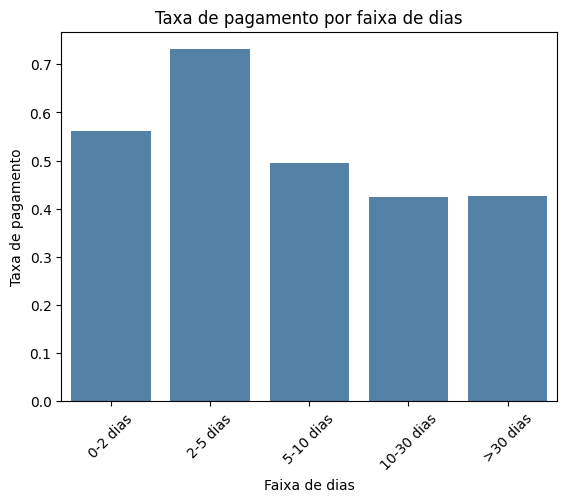

In [32]:
# Define os bins para categorizar a diferença em dias entre a data de vencimento e a data de cobrança
bins = [0, 2, 5, 10, 30, df_acoes_mensalidade['dias_dif'].max()]

# Define os rótulos correspondentes a cada faixa
labels = ['0-2 dias', '2-5 dias', '5-10 dias', '10-30 dias', '>30 dias']

# Cria a coluna 'faixa_dias' no DataFrame df_acoes_mensalidade, categorizando a variável 'dias_dif' com base nos intervalos definidos
df_acoes_mensalidade.loc[:, 'faixa_dias'] = pd.cut(df_acoes_mensalidade['dias_dif'], bins = bins, labels = labels, include_lowest = True)

# Calcula a taxa média de pagamento ('foi_pago') para cada faixa de dias ('faixa_dias')
taxa_pagamento_por_faixa = df_acoes_mensalidade.groupby('faixa_dias')['foi_pago'].mean()

# Garante que todas as faixas estejam presentes no índice, mesmo que não tenham dados
taxa_pagamento_por_faixa = taxa_pagamento_por_faixa.reindex(labels)

# Cria um gráfico de barras com a taxa média de pagamento por faixa de dias
sns.barplot(x = taxa_pagamento_por_faixa.index, y = taxa_pagamento_por_faixa.values, color = 'steelblue')
plt.xlabel('Faixa de dias')
plt.ylabel('Taxa de pagamento')
plt.title('Taxa de pagamento por faixa de dias')
plt.xticks(rotation = 45)
plt.show()

O gráfico acima revela que a eficácia das ações de cobrança está fortemente relacionada ao período em que são realizadas, em relação à data de vencimento.

A faixa de **2 a 5** dias, antes ou depois do vencimento, apresenta a maior taxa média de pagamento (acima de 70%), indicando que esse é o intervalo mais estratégico para a realização de cobranças. Em seguida, a faixa de **0 a 2** dias também se mostra eficaz, com uma taxa em torno de 56%.

A partir da faixa de **5 a 10** dias, observa-se uma queda significativa na taxa de pagamento, que se mantém nas faixas mais distantes. Isso sugere que ações realizadas com muita antecedência ou com atraso excessivo tendem a ser menos efetivas.

Esses resultados reforçam a importância do timing na estratégia de cobrança e indicam uma janela ideal entre 2 e 5 dias do vencimento como o momento mais eficaz para a realização dessas ações.  

Obs: A variável `valor_cobrado`, apesar de inicialmente considerada, foi excluída do modelo. A correlação com a variável-alvo `foi_pago` é muito baixa (aprox. 0.088), indicando que, na prática, seu poder preditivo é desprezível. Por esse motivo, optou-se por não incluí-la no conjunto final de atributos.

In [33]:
df_mensalidades = df_mensalidades

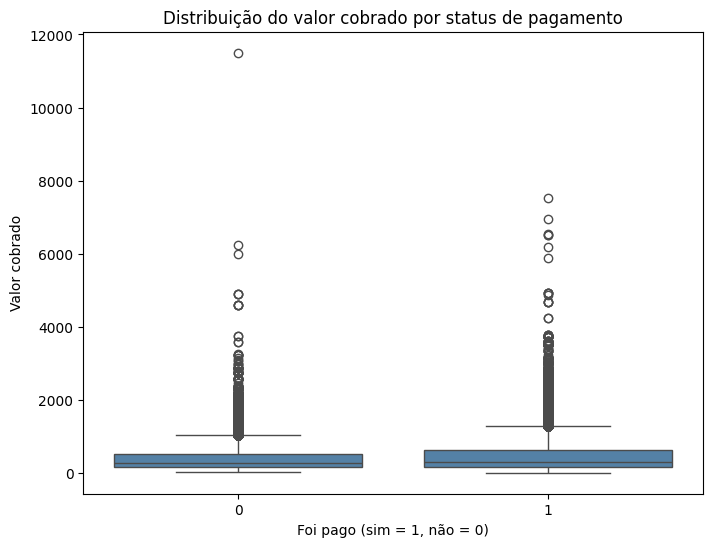

In [34]:
# Exibe o boxplot da distribuição do valor cobrado ('valor_cobrado') por status de pagamento ('foi_pago')
# O boxplot sugere que a distribuição do valor cobrado é semelhante entre os grupos de pagamento.
# As medianas são próximas, e a presença de outliers é semelhante entre os dois grupos.
# Isso sugere que o valor cobrado não é um bom preditor para o status de pagamento.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_mensalidades, x = 'foi_pago', y = 'valor_cobrado', color = 'steelblue')
plt.title('Distribuição do valor cobrado por status de pagamento')
plt.xlabel('Foi pago (sim = 1, não = 0)')
plt.ylabel('Valor cobrado')
plt.show()

In [35]:
# Exibe a correlação entre a variável-alvo 'foi_pago' e a variável 'valor_cobrado', com um valor próximo de zero, indicando que não há uma relação linear forte entre elas
df_mensalidades['foi_pago'].corr(df_mensalidades['valor_cobrado'])

np.float64(0.08796932577626994)

In [36]:
# Exibe as correlações entre as variáveis numéricas do DataFrame df_mensalidades
df_mensalidades[['foi_pago', 'valor_cobrado', 'data_vencimento', 'data_baixa']].corr()

,foi_pago,valor_cobrado,data_vencimento,data_baixa
foi_pago,1.000000,0.087969,-0.300477,0.999998
valor_cobrado,0.087969,1.000000,-0.240533,0.087481
data_vencimento,-0.300477,-0.240533,1.000000,-0.298963
data_baixa,0.999998,0.087481,-0.298963,1.000000


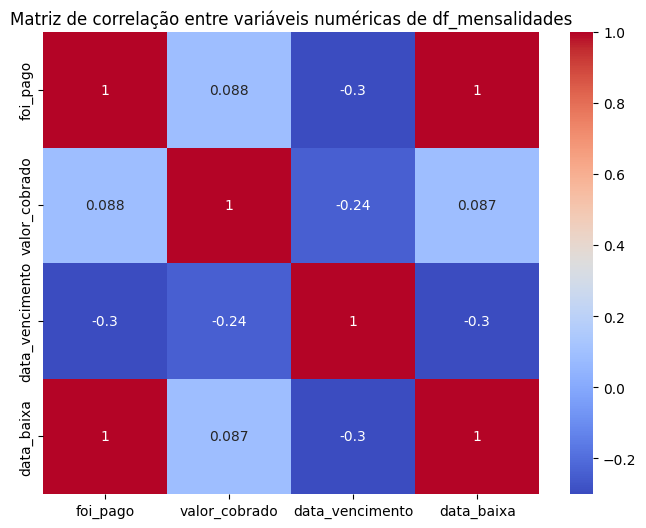

In [37]:
# Exibe um heatmap da matriz de correlação entre as variáveis numéricas do DataFrame df_mensalidades
plt.figure(figsize = (8, 6))
sns.heatmap(df_mensalidades[['foi_pago', 'valor_cobrado', 'data_vencimento', 'data_baixa']].corr(), annot = True, cmap = 'coolwarm')
plt.title('Matriz de correlação entre variáveis numéricas de df_mensalidades')
plt.show()

## 5. Modelagem Preditiva

Após a análise exploratória, esta seção tem por objetivo construir um modelo preditivo capaz de estimar a probabilidade de pagamento de uma mensalidade após uma ação de cobrança.

A modelagem será conduzida por meio de algoritmos de classificação supervisionada, que serão treinados com os dados tratados a fim de identificar quais variáveis estão mais associadas ao pagamento ou à inadimplência. O modelo resultante poderá ser utilizado como uma ferramenta estratégica para priorizar ações de cobrança com maior chance de sucesso.

### 5.1. Engenharia de features

Nesta subseção, selecionamos as variáveis mais relevantes para o problema e realizamos as transformações necessárias para adequá-las ao modelo preditivo.

As variáveis utilizadas são:

- `acao_cobranca`: variável categórica que representa o tipo de ação de cobrança realizada;
- `dias_dif`: variável numérica que expressa a diferença, em dias, entre a data da ação de cobrança e a data de vencimento da mensalidade;
- `foi_pago`: variável binária que representa o status de pagamento da mensalidade (1 para pago e 0 para não pago), sendo a variável-alvo do modelo.

A variável `acao_cobranca` foi codificada por meio de OHE, e `dias_dif` foi mantida em seu formato contínuo.

In [38]:
# Cria o DataFrame final para o modelo
df_modelo = df_acoes_mensalidade[['acao_cobranca', 'dias_dif', 'foi_pago']].copy()

# Aplica o one-hot encoding na coluna 'acao_cobranca', para transformar as categorias em variáveis binárias
df_modelo = pd.get_dummies(df_modelo, columns = ['acao_cobranca'], drop_first = True)

# Exibe as primeiras 10 linhas do DataFrame df_modelo
df_modelo.head(10)

,dias_dif,foi_pago,acao_cobranca_e-mail,acao_cobranca_ligação telefônica,acao_cobranca_negativação,acao_cobranca_whatsapp
2002602,0,1,True,False,False,False
2169925,0,0,True,False,False,False
3139598,0,0,True,False,False,False
2169863,0,0,True,False,False,False
3989977,0,1,True,False,False,False
554755,0,0,False,False,False,True
325939,0,1,False,False,False,True
797390,0,0,False,False,False,True
2169801,0,0,True,False,False,False
3989982,0,1,True,False,False,False


### 5.2. Divisão do conjunto de dados

Nesta etapa, realizamos a divisão do conjunto de dados `df_modelo` em dois subconjuntos: treino e teste, na proporção 80/20. O objetivo é garantir que o modelo seja treinado com a maior parte dos dados, mas avaliado em dados separados, garantindo uma estimativa justa de seu desempenho.

Utilizamos `stratify = y` para manter a proporção de classes (`foi_pago`) nos dois conjuntos, evitando desbalanceamento. 

In [39]:
from sklearn.model_selection import train_test_split

# Define as variáveis preditoras (X) e alvo (y)
X = df_modelo.drop(columns = ['foi_pago'])
y = df_modelo['foi_pago']

# Divide os dados em conjuntos de treino e teste, com 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 79)

# Exibe o tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino: {X_train.shape[0]}.")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}.")

Tamanho do conjunto de treino: 596744.
Tamanho do conjunto de teste: 149187.


## 5.3. Regressão logística

### 5.3.1. Treinamento e previsões

In [40]:
# Importa o modelo de Regressão Logística do scikit-learn
from sklearn.linear_model import LogisticRegression

In [41]:
# Cria a instância do modelo de Regressão Logística e o treina com os dados de treino
logreg_model = LogisticRegression(random_state = 79, max_iter = 1000)
logreg_model.fit(X_train, y_train) 

LogisticRegression(max_iter=1000, random_state=79)

In [42]:
# Faz previsões com o modelo treinado nos dados de teste
y_pred_logreg = logreg_model.predict(X_test)

### 5.3.2. Avaliação do modelo

In [43]:
# Importa as métricas de avaliação do scikit-learn
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report
)

In [44]:
print(f"Relatório de classificação:\n{classification_report(y_test, y_pred_logreg)}")

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.59      0.31      0.41     65458
           1       0.61      0.83      0.70     83729

    accuracy                           0.60    149187
   macro avg       0.60      0.57      0.55    149187
weighted avg       0.60      0.60      0.57    149187



In [45]:
# Métricas da classe 0 (não pago)
logreg_precision_0 = precision_score(y_test, y_pred_logreg, pos_label = 0)
logreg_recall_0 = recall_score(y_test, y_pred_logreg, pos_label = 0)
logreg_f1_0 = f1_score(y_test, y_pred_logreg, pos_label = 0)

# Métricas da classe 1 (pago)
logreg_precision_1 = precision_score(y_test, y_pred_logreg, pos_label = 1)
logreg_recall_1 = recall_score(y_test, y_pred_logreg, pos_label = 1)
logreg_f1_1 = f1_score(y_test, y_pred_logreg, pos_label = 1)

In [46]:
# Métricas de avaliação para a classe 0 (não pago)

print(f"--- Regressão Logística ---\n")

print(f"Classe 0 (não pago):")
print(f"Precisão: {logreg_precision_0:.8f}")
print(f"Recall: {logreg_recall_0:.8f}")
print(f"F1-score: {logreg_f1_0:.8f}\n")

# Métricas de avaliação para a classe 1 (pago)
print(f"Classe 1 (pago):")
print(f"Precisão: {logreg_precision_1:.8f}")
print(f"Recall: {logreg_recall_1:.8f}")
print(f"F1-score: {logreg_f1_1:.8f}\n")

# Métricas gerais
print(f"Métricas gerais:")
print(f"Precisão: {precision_score(y_test, y_pred_logreg):.8f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred_logreg):.8f}")
print(f"Acurácia balanceada: {balanced_accuracy_score(y_test, y_pred_logreg):.8f}")

--- Regressão Logística ---

Classe 0 (não pago):
Precisão: 0.59121800
Recall: 0.30833512
F1-score: 0.40529740

Classe 1 (pago):
Precisão: 0.60647202
Recall: 0.83333134
F1-score: 0.70202940

Métricas gerais:
Precisão: 0.60647202
Acurácia: 0.60298149
Acurácia balanceada: 0.57083323


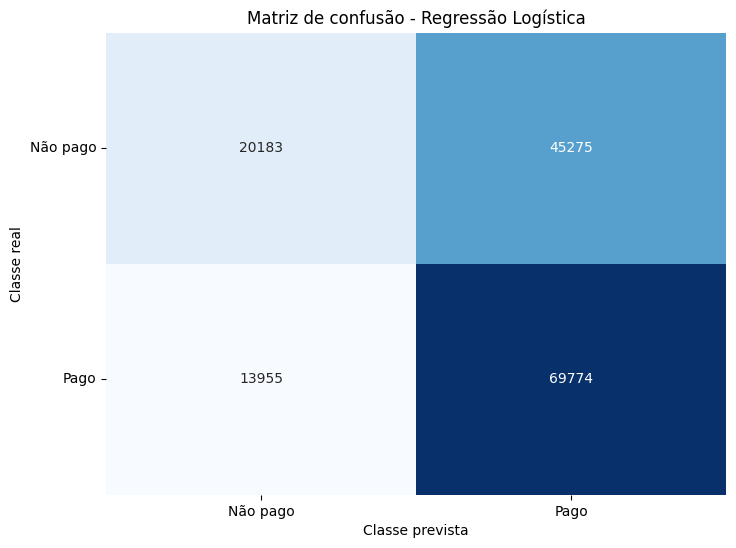

In [47]:
# Matriz de confusão
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Exibe a matriz de confusão
plt.figure(figsize = (8, 6))
sns.heatmap(cm_logreg, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Matriz de confusão - Regressão Logística')
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')
plt.xticks(ticks = [0.5, 1.5], labels = ['Não pago', 'Pago'])
plt.yticks(ticks = [0.5, 1.5], labels = ['Não pago', 'Pago'], rotation = 0)
plt.show()

In [48]:
# Verdadeiros e falsos positivos e negativos
tn_logreg, fp_logreg, fn_logreg, tp_logreg = cm_logreg.ravel()
print(f"Verdadeiros negativos: {tn_logreg}.")
print(f"Falsos positivos: {fp_logreg}.")
print(f"Falsos negativos: {fn_logreg}.")
print(f"Verdadeiros positivos: {tp_logreg}.")

Verdadeiros negativos: 20183.
Falsos positivos: 45275.
Falsos negativos: 13955.
Verdadeiros positivos: 69774.


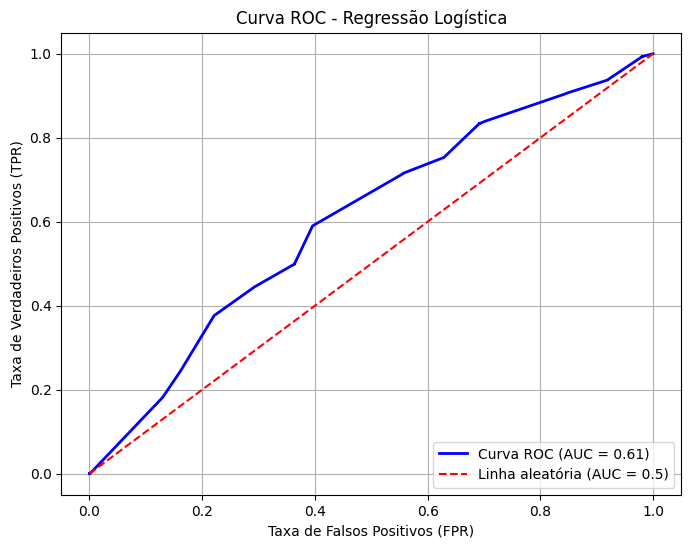

In [49]:
# Curvas ROC e AUC

# Importa as bibliotecas necessárias para calcular a curva ROC e AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Probabilidades preditas para a classe 1 (pagamento)
y_scores_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_scores_logreg)

# Plota a curva ROC
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'blue', label = f'Curva ROC (AUC = {roc_auc_logreg:.2f})', linewidth = 2)
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--', label = 'Linha aleatória (AUC = 0.5)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

### 5.3.3. Resultados do modelo de regressão logística

In [50]:
# Cria um DataFrame com os resultados do modelo de regressão logística a partir do dicionário de métricas

results_logreg = {
    'Modelo': 'Regressão Logística',
    'Precisão': precision_score(y_test, y_pred_logreg),
    'Acurácia': accuracy_score(y_test, y_pred_logreg),
    'Acurácia Balanceada': balanced_accuracy_score(y_test, y_pred_logreg),
    'F1 (Classe 0)': logreg_f1_0,
    'F1 (Classe 1)': logreg_f1_1,
    'Recall (Classe 0)': logreg_recall_0,
    'Recall (Classe 1)': logreg_recall_1,
    'AUC': roc_auc_logreg
}

df_logreg = pd.DataFrame([results_logreg])

In [51]:
# Exibe o DataFrame df_logreg
df_logreg

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,Regressão Logística,0.606472,0.602981,0.570833,0.405297,0.702029,0.308335,0.833331,0.605443


#### Avaliação do Modelo de Regressão Logística

- **Precisão geral**: cerca de **60%**, ou seja, entre todas as previsões de "pagamento", **60%** foram corretas.
- **Acurácia**: **60,3%**, indicando que o modelo acerta 6 a cada 10 casos.
- **Acurácia balanceada**: **57%**, refletindo desequilíbrio no desempenho entre pagadores e inadimplentes.
- **AUC**: **0.61**, sugerindo capacidade limitada de distinguir entre as classes.

**Classe 1 (pagamento)**:
- **Recall**: **83%**, com F1-score de **0.70** - o modelo cobre bem os casos pagos, o que evita cobranças desnecessárias.

**Classe 0 (não pagamento)**:
- **Recall**: **31%**, com F1-score de **0.41** - baixo desempenho, indicando falha em identificar inadimplentes.

**Conclusão**: A regressão logística é um excelente ponto de partida, pois possui um alto recall para pagamentos, o que está de acordo com o objetivo de detecção de pagamentos após ações de cobrança. No entanto, o modelo apresenta um desempenho insatisfatório na identificação de inadimplentes.

## 5.4. Decision Tree

### 5.4.1. Treinamento e previsões

In [52]:
# Importa o modelo de Decision Tree do scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Cria a instância do modelo de Decision Tree e o treina com os dados de treino
dt_model = DecisionTreeClassifier(random_state = 79)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=79)

In [54]:
# Faz previsões com o modelo treinado nos dados de teste
y_pred_dt = dt_model.predict(X_test)

### 5.4.2. Avaliação do modelo

In [55]:
print(f"Relatório de classificação:\n{classification_report(y_test, y_pred_dt)}")

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56     65458
           1       0.66      0.67      0.66     83729

    accuracy                           0.62    149187
   macro avg       0.61      0.61      0.61    149187
weighted avg       0.62      0.62      0.62    149187



In [56]:
# Função que automatiza a obtenção de métricas de avaliação para um modelo preditivo
def get_metrics(y_test, y_pred, model_name: str = 'Modelo'):
    """Automatiza o cálculo e a impressão de métricas de avaliação para um modelo preditivo."""
    
    # Classe 0 (não pagamento)
    precision_0 = precision_score(y_test, y_pred, pos_label = 0)
    recall_0 = recall_score(y_test, y_pred, pos_label = 0)
    f1_0 = f1_score(y_test, y_pred, pos_label = 0)

    # Classe 1 (pagamento)
    precision_1 = precision_score(y_test, y_pred, pos_label = 1)
    recall_1 = recall_score(y_test, y_pred, pos_label = 1)
    f1_1 = f1_score(y_test, y_pred, pos_label = 1)

    # Métricas gerais
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Impressão dos resultados
    print(f"--- {model_name} ---\n")
    
    print("Classe 0 (não pago):")
    print(f"Precisão: {precision_0:.8f}")
    print(f"Recall:    {recall_0:.8f}")
    print(f"F1-score:  {f1_0:.8f}\n")

    print("Classe 1 (pago):")
    print(f"Precisão: {precision_1:.8f}")
    print(f"Recall:    {recall_1:.8f}")
    print(f"F1-score:  {f1_1:.8f}\n")

    print("Métricas gerais:")
    print(f"Precisão geral:        {precision:.8f}")
    print(f"Acurácia:              {accuracy:.8f}")
    print(f"Acurácia balanceada:   {balanced_accuracy:.8f}")

In [57]:
# Imprime as métricas de avaliação para o modelo de Decision Tree
get_metrics(y_test, y_pred_dt, model_name = 'Decision Tree')

--- Decision Tree ---

Classe 0 (não pago):
Precisão: 0.56838179
Recall:    0.55166672
F1-score:  0.55989953

Classe 1 (pago):
Precisão: 0.65737736
Recall:    0.67249101
F1-score:  0.66484830

Métricas gerais:
Precisão geral:        0.65737736
Acurácia:              0.61947757
Acurácia balanceada:   0.61207887


In [58]:
# Função que automatiza a exibição da matriz de confusão para diferentes modelos
def plot_confusion_matrix(y_test, y_pred, model_name: str, cmap = 'Blues'):
    """Exibe a matriz de confusão para um modelo especificado."""
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = cmap)
    plt.title(f'Matriz de confusão - {model_name}')
    plt.xlabel('Classe prevista')
    plt.ylabel('Classe real')
    plt.xticks(ticks = [0.5, 1.5], labels = ['Não pago', 'Pago'])
    plt.yticks(ticks = [0.5, 1.5], labels = ['Não pago', 'Pago'], rotation=0)
    plt.show()


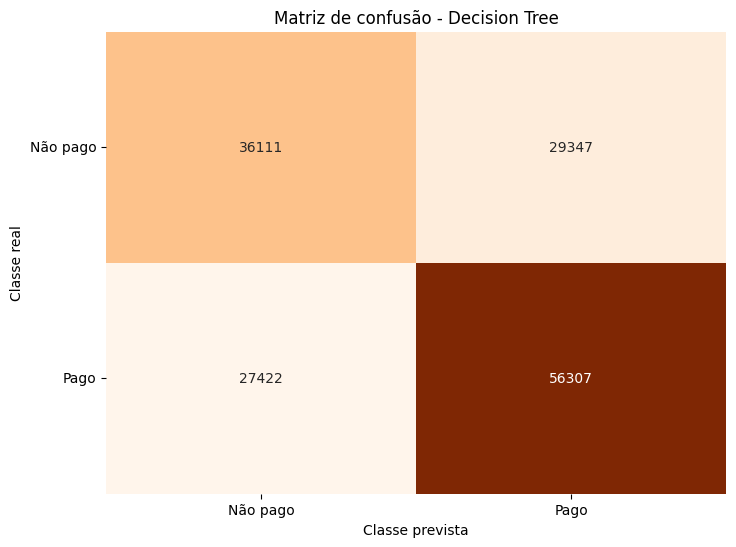

In [59]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree', cmap = 'Oranges')

In [60]:
# Calcula as probabilidades preditas para a classe 1 (pagamento)
y_scores_dt = dt_model.predict_proba(X_test)[:, 1]

In [61]:
# Função que automatiza a plotagem da curva ROC e AUC para diferentes modelos
def plot_roc_curve(y_test, y_scores, model_name: str):
    """Automatiza a exibição da curva ROC e AUC para um modelo especificado."""
    
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    
    plt.figure(figsize = (8, 6))
    plt.plot(fpr, tpr, color = 'blue', label = f'Curva ROC (AUC = {auc_score:.2f})', linewidth = 2)
    plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--', label = 'Linha aleatória (AUC = 0.5)')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc = 'lower right')
    plt.grid()
    plt.show()

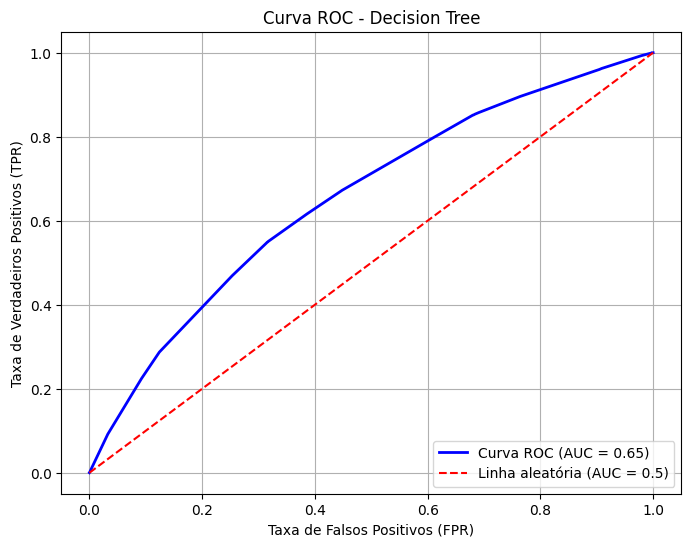

In [62]:
# Curva ROC e AUC
roc_dt = plot_roc_curve(y_test, y_scores_dt, 'Decision Tree')

### 5.4.3. Resultados do modelo de Decision Tree

In [63]:
# Função para automatizar a criação de um DataFrame com os resultados do modelo
def results_per_model(model_name: str, y_test, y_pred, y_scores) -> pd.DataFrame:
    """Automatiza a criação de um DataFrame com os resultados do modelo."""
    
    results = {
        'Modelo': model_name,
        'Precisão': precision_score(y_test, y_pred),
        'Acurácia': accuracy_score(y_test, y_pred),
        'Acurácia Balanceada': balanced_accuracy_score(y_test, y_pred),
        'F1 (Classe 0)': f1_score(y_test, y_pred, pos_label = 0),
        'F1 (Classe 1)': f1_score(y_test, y_pred, pos_label = 1),
        'Recall (Classe 0)': recall_score(y_test, y_pred, pos_label = 0),
        'Recall (Classe 1)': recall_score(y_test, y_pred, pos_label = 1),
        'AUC': roc_auc_score(y_test, y_scores)
    }
    
    return pd.DataFrame([results])

In [64]:
df_dt = results_per_model('Decision Tree', y_test, y_pred_dt, y_scores_dt)

In [65]:
df_dt

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,Decision Tree,0.657377,0.619478,0.612079,0.5599,0.664848,0.551667,0.672491,0.654858


#### Avaliação do Modelo de Decision Tree

- **Precisão geral**: aproximadamente **65,7%**, indicando que a maioria das previsões de "pagamento" foram corretas.
- **Acurácia**: **61,9%**, superando a regressão logística e indicando melhor desempenho geral.
- **Acurácia balanceada**: **61,2%**, revelando maior equilíbrio na capacidade de tratar pagadores e inadimplentes.
- **AUC**: **0.65**, indicando desempenho satisfatório em distinguir entre as duas classes — superior ao modelo baseline.

**Classe 1 (pagamento)**:
- **Recall**: **67%**, com **F1-score de 0.66** - desempenho consistente, com boa identificação dos pagamentos.

**Classe 0 (não pagamento)**:
- **Recall**: **55%**, com **F1-score de 0.56** - melhora significativa em relação à regressão logística, com maior cobertura dos inadimplentes.

**Conclusão**: A Decision Tree é mais eficaz e equilibrada que a regressão logística, conseguindo capturar melhor tanto os pagadores quanto os inadimplentes, e se apresenta como uma alternativa mais robusta.

## 5.5. Random Forest 

### 5.5.1. Treinamento e previsões

In [66]:
# Importa o modelo de Random Forest do scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Cria a instância do modelo de Random Forest e o treina com os dados de treino
# O modelo é configurado com 500árvores, profundidade máxima de 20 e pesos balanceados para as classes
rf_model = RandomForestClassifier(n_estimators = 500, max_depth = 20, random_state = 79, class_weight = 'balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=500,
                       random_state=79)

In [68]:
# Faz previsões com o modelo treinado nos dados de teste
y_pred_rf = rf_model.predict(X_test)

### 5.5.2. Avaliação do modelo

In [69]:
print(f"Relatório de classificação:\n{classification_report(y_test, y_pred_rf)}")

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.54      0.68      0.61     65458
           1       0.69      0.55      0.61     83729

    accuracy                           0.61    149187
   macro avg       0.62      0.62      0.61    149187
weighted avg       0.63      0.61      0.61    149187



In [70]:
# Imprime as métricas de avaliação para o modelo de Random Forest
get_metrics(y_test, y_pred_rf, model_name = 'Random Forest')

--- Random Forest ---

Classe 0 (não pago):
Precisão: 0.54283773
Recall:    0.68365975
F1-score:  0.60516440

Classe 1 (pago):
Precisão: 0.68977348
Recall:    0.54988116
F1-score:  0.61193405

Métricas gerais:
Precisão geral:        0.68977348
Acurácia:              0.60857850
Acurácia balanceada:   0.61677046


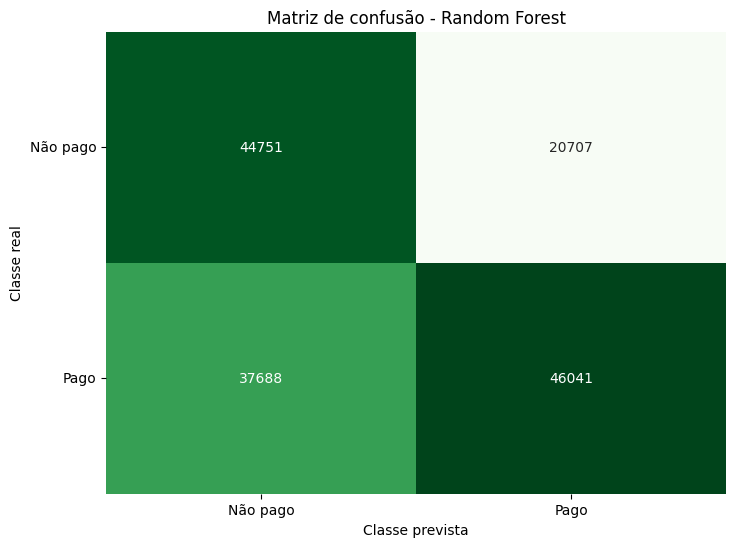

In [71]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest', 'Greens')

In [72]:
# Calcula as probabilidades preditas para a classe 1 (pagamento)
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]

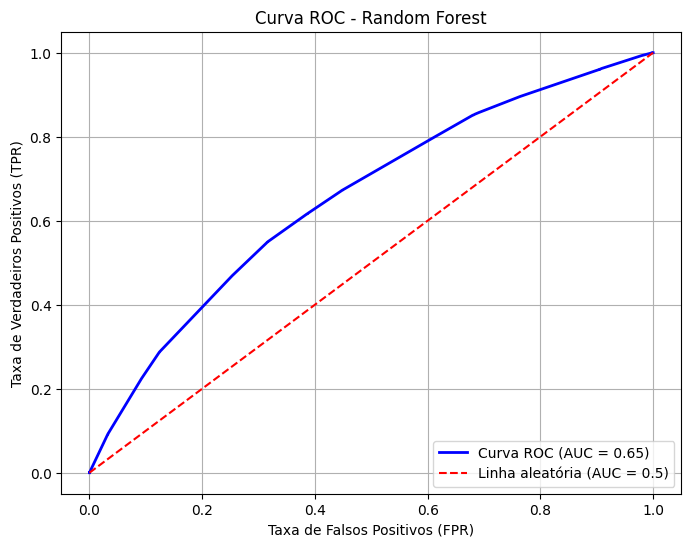

In [73]:
# Curva ROC e AUC
roc_rf = plot_roc_curve(y_test, y_scores_rf, 'Random Forest')

### 5.5.3. Resultados do modelo de Random Forest

In [74]:
df_rf = results_per_model('Random Forest', y_test, y_pred_rf, y_scores_rf)

In [75]:
# Exibe o DataFrame df_rf
df_rf

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,Random Forest,0.689773,0.608578,0.61677,0.605164,0.611934,0.68366,0.549881,0.65484


#### Avaliação do Modelo de Random Forest

- **Precisão geral**: aproximadamente **68,9%**, superior tanto à Regressão Logística (60,6%) quanto à Decision Tree (65,7)%.
- **Acurácia**: **60%**, inferior à Decision Tree (61,9%), mas ainda superior à Regressão Logística (60,3%).
- **Acurácia balanceada**: **61,7%**, superando tanto a regressão logística (57,1%) quanto ligeiramente a decision tree (61,2%).
- **AUC**: **0.65**, alinhado com o resultado da Decision Tree e superior ao da Regressão Logística (0.61), indicando boa capacidade de distinção.

**Classe 1 (pagamento)**:
- **Recall**: **55%**, com **F1-score de 0.61** - desempenho sólido, embora abaixo da Decision Tree (67% de recall, com F1-score de 0.66).

**Classe 0 (não pagamento)**:
- **Recall**: **68%**, com **F1-score de 0.60** - desempenho claramente superior ao da Regressão Logística (recall de 31%) e também superior ao da Decision Tree (55%).

**Conclusão**: A Random Forest destacou-se especialmente na identificação de inadimplentes, com um recall de 68%, oferecendo o maior recall entre os modelos testados. Apesar de ligeiramente inferior à Decision Tree na detecção de pagamentos, seu desempenho mais equilibrado a torna uma opção viável, sobretudo para o foco do negócio, que é a identificação de inadimplentes.

## 5.6. XGBoost

### 5.6.1. Treinamento e previsões

In [76]:
# Importa o modelo de XGBoost 
from xgboost import XGBClassifier

In [77]:
# Cria a instância do modelo de XGBoost e o treina com os dados de treino
# Os hiperparâmetros são definidos para 500 árvores, profundidade máxima de 20, taxa de aprendizado de 0.1, amostragem de 80% e amostragem de colunas de 80%
xgb_model = XGBClassifier(n_estimators = 500, 
                          max_depth = 20, 
                          learning_rate = 0.1,
                          subsample = 0.8,
                          colsample_bytree = 0.8,
                          random_state = 79,
                          use_label_encoder = False,
                          eval_metric = 'logloss')
xgb_model.fit(X_train, y_train)

c:\environments\DS_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:20:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [78]:
# Faz previsões com o modelo treinado nos dados de teste
y_pred_xgb = xgb_model.predict(X_test)

### 5.6.2. Avaliação do modelo

In [79]:
print(f"Relatório de classificação:\n{classification_report(y_test, y_pred_xgb)}")

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56     65458
           1       0.66      0.67      0.66     83729

    accuracy                           0.62    149187
   macro avg       0.61      0.61      0.61    149187
weighted avg       0.62      0.62      0.62    149187



In [80]:
# Imprime as métricas de avaliação para o modelo XGBoost
get_metrics(y_test, y_pred_rf, model_name = 'XGBoost')

--- XGBoost ---

Classe 0 (não pago):
Precisão: 0.54283773
Recall:    0.68365975
F1-score:  0.60516440

Classe 1 (pago):
Precisão: 0.68977348
Recall:    0.54988116
F1-score:  0.61193405

Métricas gerais:
Precisão geral:        0.68977348
Acurácia:              0.60857850
Acurácia balanceada:   0.61677046


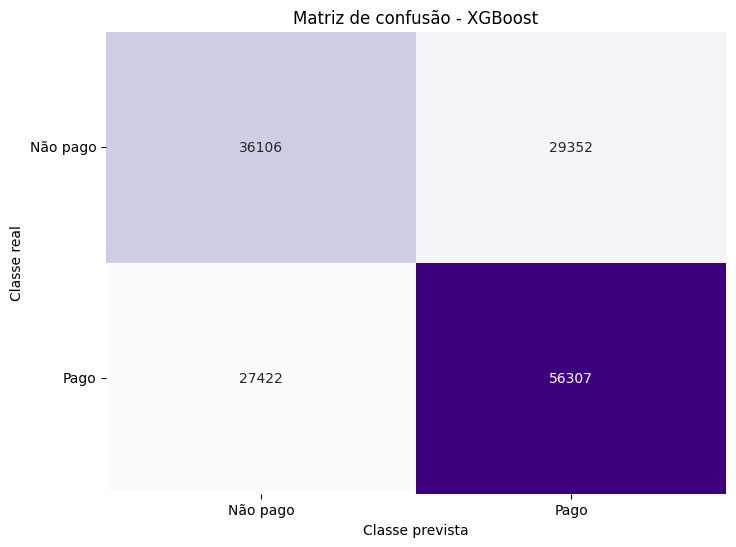

In [81]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost', cmap = 'Purples')

In [82]:
# Calcula as probabilidades preditas para a classe 1 (pagamento)
y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]

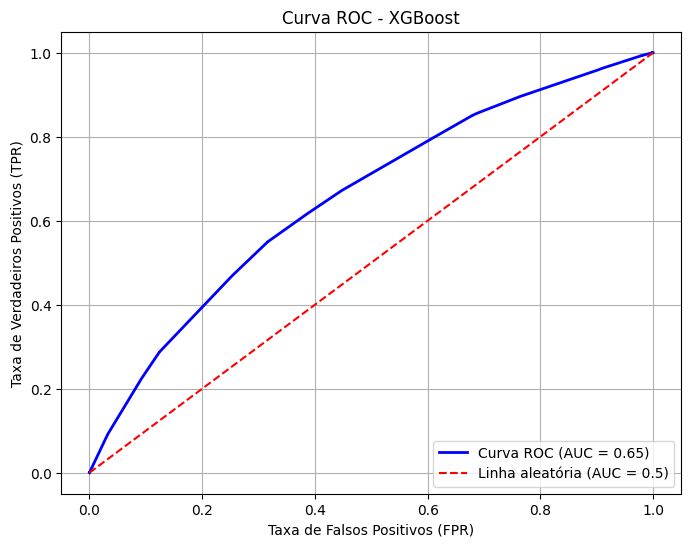

In [83]:
# Curva ROC e AUC
roc_xgb = plot_roc_curve(y_test, y_scores_xgb, 'XGBoost')

In [84]:
df_xgb = results_per_model('XGBoost', y_test, y_pred_xgb, y_scores_xgb)

In [85]:
df_xgb

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,XGBoost,0.657339,0.619444,0.612041,0.559844,0.664829,0.55159,0.672491,0.654829


### Avaliação do Modelo de XGBoost

- **Precisão geral**: aproximadamente **65,7%**, similar à Decision Tree (65,7%) e superior à Regressão Logística (60,6%), mas inferior à Random Forest (68,9%).

- **Acurácia**: **61,9%**, alinhada com a árvore de decisão e superior à regressão logística.

- **Acurácia balanceada**: **61,2%**, mostrando bom equilíbrio no tratamento das duas classes.

- **AUC**: 0.65, indicando boa capacidade de separação entre pagadores e inadimplentes — equivalente à Decision Tree e Random Forest.

**Classe 1 (pagamento)**:

- **Recall**: **67%**, com F1-score de 0.66 - desempenho robusto, semelhante ao da árvore de decisão, com bom poder de identificação dos alunos que pagam.

**Classe 0 (não pagamento)**:

- **Recall**: **55%**, com F1-score de 0.56 - melhora expressiva em relação à regressão logística, equiparando-se à Decision Tree.

**Conclusão**: O XGBoost apresentou desempenho bastante semelhante ao da Decision Tree e ao da Random Forest, com métricas equilibradas entre as classes. Embora não tenha se destacado isoladamente, mostra-se competitivo, robusto e confiável, sendo uma sólida escolha para o problema, especialmente com possibilidade de ajustes de hiperparâmetros e pelo fato de ser mais leve e rápido do que a Random Forest, por exemplo. 

## 5.7. Gradient Boosting

### 5.7.1. Treinamento e previsões

In [86]:
# Importa o modelo de Gradient Boosting do scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
# Cria a instância do modelo de Gradient Boosting e o treina com os dados de treino
# Os hiperparâmetros são definidos para 300 árvores, taxa de aprendizado de 0.1, profundidade máxima de 5, amostragem de 80%, mínimo de 10 amostras para divisão e mínimo de 5 amostras para folha
gb_model = GradientBoostingClassifier(n_estimators = 300, 
                                      learning_rate = 0.1,
                                      max_depth = 5,
                                      subsample = 0.8,
                                      min_samples_split = 10,
                                      min_samples_leaf = 5,
                                      max_features = 'log2',
                                      random_state = 79)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features='log2', min_samples_leaf=5,
                           min_samples_split=10, n_estimators=300,
                           random_state=79, subsample=0.8)

In [88]:
# Faz previsões com o modelo treinado nos dados de teste
y_pred_gb = gb_model.predict(X_test)

### 5.7.2. Avaliação do modelo

In [89]:
print(f"Relatório de classificação:\n{classification_report(y_test, y_pred_gb)}")

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56     65458
           1       0.66      0.67      0.66     83729

    accuracy                           0.62    149187
   macro avg       0.61      0.61      0.61    149187
weighted avg       0.62      0.62      0.62    149187



In [90]:
# Imprime as métricas de avaliação para o modelo de Gradient Boosting
get_metrics(y_test, y_pred_gb, model_name = 'Gradient Boosting')

--- Gradient Boosting ---

Classe 0 (não pago):
Precisão: 0.56835031
Recall:    0.55163616
F1-score:  0.55986852

Classe 1 (pago):
Precisão: 0.65735401
Recall:    0.67246713
F1-score:  0.66482469

Métricas gerais:
Precisão geral:        0.65735401
Acurácia:              0.61945076
Acurácia balanceada:   0.61205164


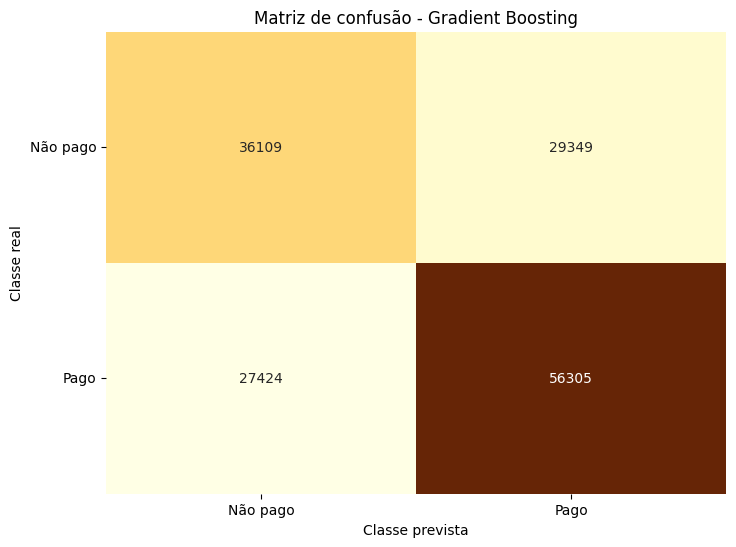

In [91]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting', cmap = 'YlOrBr')

In [92]:
# Calcula as probabilidades preditas para a classe 1 (pagamento)
y_scores_gb = gb_model.predict_proba(X_test)[:, 1]

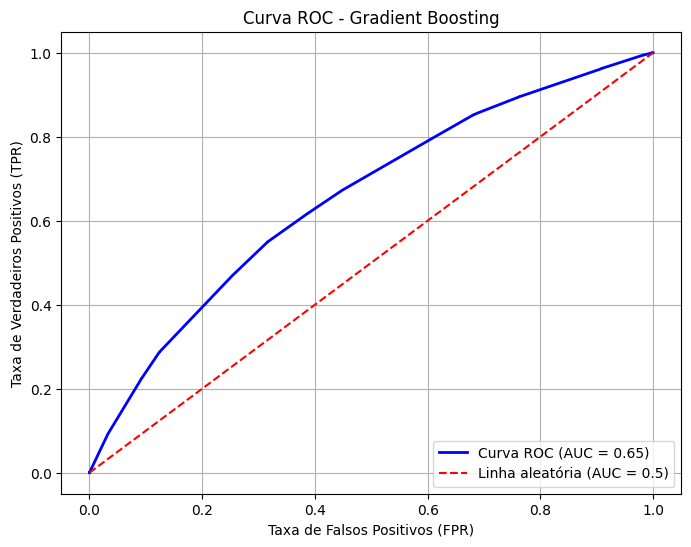

In [93]:
# Curva ROC e AUC
roc_gb = plot_roc_curve(y_test, y_scores_gb, 'Gradient Boosting')

### 5.7.3. Resultados do modelo de Gradient Boosting

In [94]:
df_gb = results_per_model('Gradient Boosting', y_test, y_pred_gb, y_scores_gb)

### Avaliação do Modelo de Gradient Boosting

- **Precisão geral**: aproximadamente **65,7%**, indicando que a maioria das previsões de "pagamento" foram corretas.
- **Acurácia**: **61,9%**, superando a Regressão Logística e Random Forest, e empatando com XGBoost e Decision Tree.
- **Acurácia balanceada**: **61,2%**, o que demonstra bom equilíbrio na classificação das duas classes.
- **AUC**: **0.65**, o que representa uma capacidade aceitável de distinguir entre pagadores e inadimplentes.

**Classe 1 (pagamento)**:
- **Recall**: **67%**, com **F1-score de 0.66** - desempenho consistente, capturando a maioria dos pagamentos com boa precisão.

**Classe 0 (não pagamento)**:
- **Recall**: **55%**, com **F1-score de 0.56** - superior à Regressão Logística, mas inferior à Random Forest e Decision Tree.

**Conclusão**: O Gradient Boosting mostra desempenho similar aos demais modelos de ensemble, com métricas muito próximas de Decision Tree e XGBoost. Seu tempo de processamento, no entanto, é mais elevado, o que pode não justificar seu uso se o ganho de desempenho não for notável em relação a outros modelos mais simples, como a Decision Tree.

## 5.8. LightGBM

### 5.8.1. Treinamento e previsões

In [95]:
# Importa o modelo de LightGBM
!pip install lightgbm
from lightgbm import LGBMClassifier


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
# Cria a instância do modelo de LightGBM e o treina com os dados de treino
lgbm_model = LGBMClassifier(random_state = 79)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 334915, number of negative: 261829
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 596744, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.561237 -> initscore=0.246185
[LightGBM] [Info] Start training from score 0.246185


LGBMClassifier(random_state=79)

In [97]:
# Faz previsões com o modelo treinado nos dados de teste
y_pred_lgbm = lgbm_model.predict(X_test)

### 5.8.2. Avaliação do modelo

In [98]:
print(f"Relatório de classificação:\n{classification_report(y_test, y_pred_lgbm)}")

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56     65458
           1       0.66      0.67      0.66     83729

    accuracy                           0.62    149187
   macro avg       0.61      0.61      0.61    149187
weighted avg       0.62      0.62      0.62    149187



In [99]:
# Imprime as métricas de avaliação para o modelo de LightGBM
get_metrics(y_test, y_pred_lgbm, model_name = 'LightGBM')

--- LightGBM ---

Classe 0 (não pago):
Precisão: 0.56832958
Recall:    0.55152922
F1-score:  0.55980338

Classe 1 (pago):
Precisão: 0.65731229
Recall:    0.67250296
F1-score:  0.66482086

Métricas gerais:
Precisão geral:        0.65731229
Acurácia:              0.61942394
Acurácia balanceada:   0.61201609


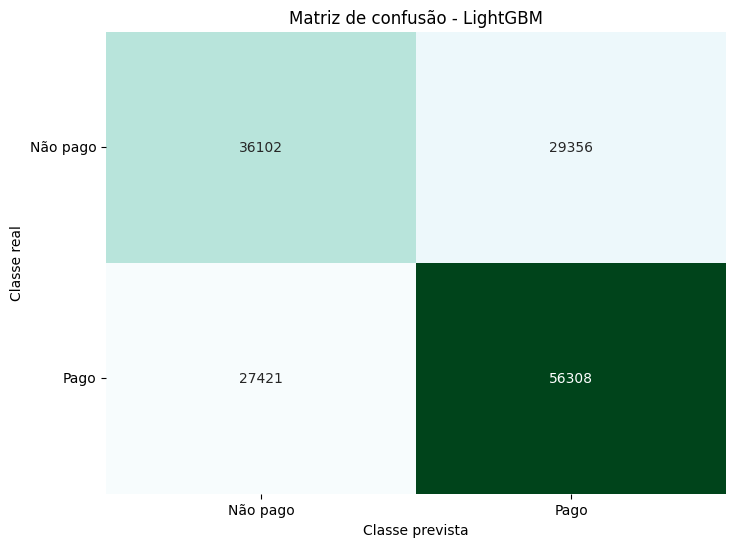

In [100]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_lgbm, 'LightGBM', cmap = 'BuGn')

In [101]:
# Calcula as probabilidades preditas para a classe 1 (pagamento)
y_scores_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

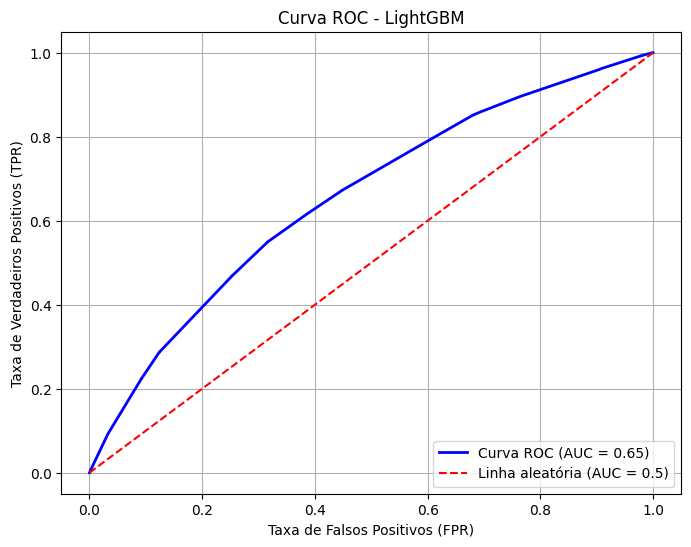

In [102]:
# Curva ROC e AUC
roc_lgbm = plot_roc_curve(y_test, y_scores_lgbm, 'LightGBM')

### 5.8.3. Resultados do modelo de LightGBM

In [103]:
df_lgbm = results_per_model('LightGBM', y_test, y_pred_lgbm, y_scores_lgbm)

In [104]:
df_lgbm

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,LightGBM,0.657312,0.619424,0.612016,0.559803,0.664821,0.551529,0.672503,0.654776


In [105]:
df_gb

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,Gradient Boosting,0.657354,0.619451,0.612052,0.559869,0.664825,0.551636,0.672467,0.654825


In [106]:
df_xgb

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,XGBoost,0.657339,0.619444,0.612041,0.559844,0.664829,0.55159,0.672491,0.654829


In [107]:
df_rf

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,Random Forest,0.689773,0.608578,0.61677,0.605164,0.611934,0.68366,0.549881,0.65484


In [108]:
df_dt

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,Decision Tree,0.657377,0.619478,0.612079,0.5599,0.664848,0.551667,0.672491,0.654858


### Avaliação do Modelo LightGBM

Os resultados do LightGBM foram praticamente idênticos aos dos outros métodos ensemble (Decision Tree, Random Forest, XGBoost e Gradient Boosting), com métricas muito próximas:

- **Precisão**: 65,7%
- **Acurácia**: 61,9%
- **Acurácia Balanceada**: 61,2%
- **F1 (Classe 0)**: 0.56
- **F1 (Classe 1)**: 0.66
- **AUC**: 0.65

Dada a semelhança dos resultados, conclui-se que os métodos ensemble convergem para um desempenho muito semelhante, e nenhuma técnica se destacou significativamente. Para tanto, empregaremos algoritmos diferentes, como Naive Bayes, KNN e SVM para averiguar se há alguma diferença significativa no desempenho.

## 5.9. Naive Bayes

### 5.9.1. Treinamento e previsões

In [109]:
# Importa o modelo de Naive Bayes do scikit-learn
from sklearn.naive_bayes import GaussianNB

In [110]:
# Cria a instância do modelo de Naive Bayes e o treina com os dados de treino
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [111]:
# Faz previsões com o modelo treinado nos dados de teste
y_pred_nb = nb_model.predict(X_test)

### 5.9.2. Avaliação do modelo

In [112]:
print(f"Relatório de classificação:\n{classification_report(y_test, y_pred_nb)}")

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.59      0.31      0.41     65458
           1       0.61      0.83      0.70     83729

    accuracy                           0.60    149187
   macro avg       0.60      0.57      0.55    149187
weighted avg       0.60      0.60      0.57    149187



In [113]:
# Imprime as métricas de avaliação para o modelo de Naive Bayes
get_metrics(y_test, y_pred_nb, model_name = 'Naive Bayes')

--- Naive Bayes ---

Classe 0 (não pago):
Precisão: 0.59127748
Recall:    0.30984754
F1-score:  0.40661588

Classe 1 (pago):
Precisão: 0.60677199
Recall:    0.83255503
F1-score:  0.70195454

Métricas gerais:
Precisão geral:        0.60677199
Acurácia:              0.60320939
Acurácia balanceada:   0.57120128


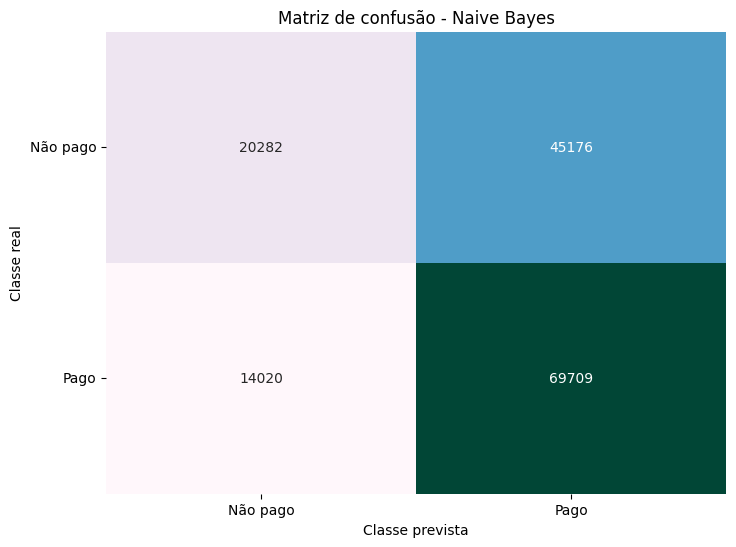

In [114]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes', cmap = 'PuBuGn')

In [115]:
# Calcula as probabilidades preditas para a classe 1 (pagamento)
y_scores_nb = nb_model.predict_proba(X_test)[:, 1]

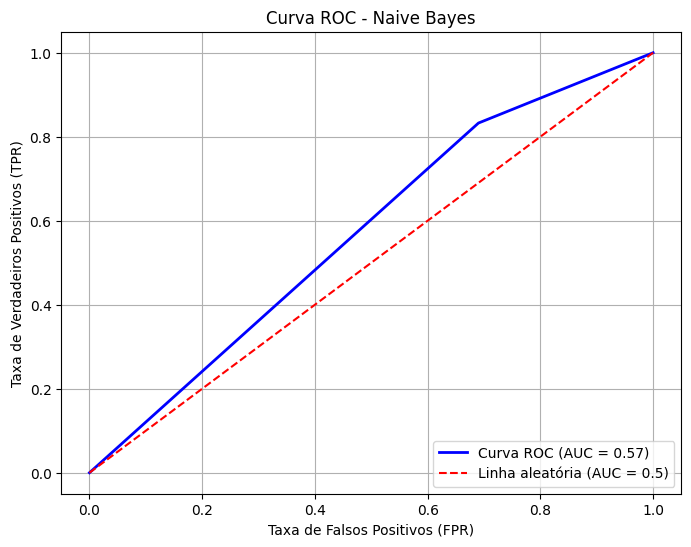

In [116]:
# Curva ROC e AUC
roc_nb = plot_roc_curve(y_test, y_pred_nb, 'Naive Bayes')

### 5.9.3. Resultados do modelo de Naive Bayes

In [117]:
df_nb = results_per_model('Naive Bayes', y_test, y_pred_nb, y_scores_nb)

In [118]:
df_nb

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,Naive Bayes,0.606772,0.603209,0.571201,0.406616,0.701955,0.309848,0.832555,0.585767


### Avaliação do Modelo de Naive Bayes

- **Precisão geral**: **60,7%**.
- **Acurácia geral**: **60,3%**, praticamente igual à da Regressão Logística.
- **Acurácia balanceada**: **57,1%**, revelando desempenho desequilibrado entre as classes.
- **AUC**: **0.58**, inferior a todos os modelos anteriores, indicando baixa capacidade de distinção entre as classes.

**Classe 1 (pagamento)**:
- **Recall**: **83,3%**, com um F1-score de **0.70** - o mais alto até então, muito bom em identificar quem pagará.

**Classe 0 (inadimplência)**:
- **Recall**: **31%**, com F1-score de **0.40** - muito baixo, ligeiramente maior do que o da Regressão Logística, o que implica que a maioria dos inadimplentes não é detectada.

**Conclusão**: O Naive Bayes é simples e rápido, mas falha em detectar os inadimplentes, que é o objetivo primordial do projeto.

### 5.10. KNN (K-Nearest Neighbors)

### 5.10.1. Treinamento e previsões

In [119]:
# Importa o modelo de KNN do scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [120]:
# Cria a instância do modelo de KNN e o treina nos dados de treino normalizados
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [121]:
# Faz previsões
y_pred_knn = knn_model.predict(X_test)

### 5.10.2. Avaliação do modelo

In [122]:
print(f"Relatório de classificação:\n{classification_report(y_test, y_pred_knn)}")

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.53      0.47      0.50     65458
           1       0.62      0.68      0.65     83729

    accuracy                           0.59    149187
   macro avg       0.58      0.57      0.57    149187
weighted avg       0.58      0.59      0.58    149187



In [123]:
# Imprime as métricas de avaliação para o modelo de KNN
get_metrics(y_test, y_pred_knn, model_name = 'KNN')

--- KNN ---

Classe 0 (não pago):
Precisão: 0.53398764
Recall:    0.47127929
F1-score:  0.50067760

Classe 1 (pago):
Precisão: 0.62141201
Recall:    0.67846266
F1-score:  0.64868537

Métricas gerais:
Precisão geral:        0.62141201
Acurácia:              0.58755790
Acurácia balanceada:   0.57487098


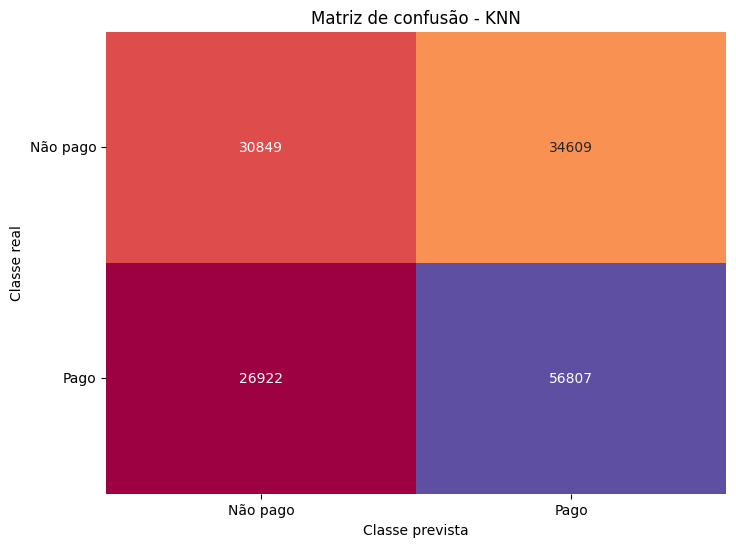

In [124]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_knn, 'KNN', cmap = 'Spectral')

In [125]:
# Calcula as probabilidades preditas para a classe 1 (pagamento)
y_scores_knn = knn_model.predict_proba(X_test)[:, 1]

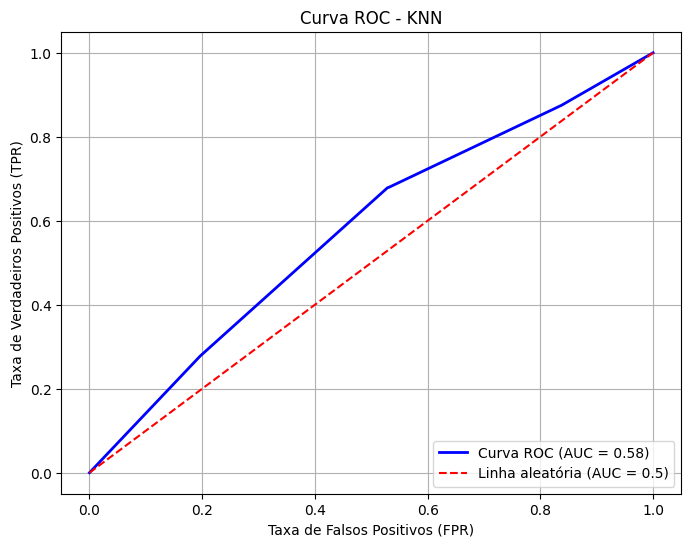

In [126]:
# Curva ROC e AUC
roc_knn = plot_roc_curve(y_test, y_scores_knn, 'KNN')

### 5.10.3. Resultados do modelo KNN

In [127]:
df_knn = results_per_model('KNN', y_test, y_pred_knn, y_scores_knn)

In [128]:
df_knn

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,KNN,0.621412,0.587558,0.574871,0.500678,0.648685,0.471279,0.678463,0.578221


#### Avaliação do Modelo KNN

- **Precisão geral**: aproximadamente **62,1%**, indicando que cerca de 62% de todas as previsões de pagamento foram corretas.
- **Acurácia**: **58,8%**, inferior à dos métodos ensemble e árvores de decisão, sugerindo desempenho global mais fraco.
- **Acurácia balanceada**: **57,5%**, evidenciando dificuldades do modelo em tratar ambas as classes de forma balanceada.
- **AUC**: **0.58**, indicando capacidade limitada de distinguir entre as classes.

**Classe 1 (pagamento)**:
- **Recall**: **67,8%**, com F1-score de **0.65** - desempenho razoável ao identificar pagamentos, superior a Random Forest, mas inferior a XGBoost.

**Classe 0 (não pagamento)**:
- **Recall**: **47,1%**, com F1-score de **0.50** - desempenho limitado na detecção de inadimplentes, o que compromete sua aplicação prática.

**Observação**:
Inicialmente, foi aplicado `StandardScaler` para lidar com a normalização das distâncias. No entanto, a normalização resultou em redução significativa no desempenho, com piora em todas as métricas, inclusive AUC. Por isso, optou-se por manter os dados em sua escala original, que se mostrou mais adequada para o conjunto e problema em questão.

**Conclusão**:
Apesar da simplicidade e intuição do KNN, o modelo não supera os métodos baseados em árvores e ensemble, tanto em equilíbrio entre classes quanto em capacidade preditiva geral.  
Embora o KNN funcione de forma razoável, os modelos ensemble (como Decision Tree, Gradient Boosting e XGBoost) permanecem as opções mais adequadas para este problema, tanto em termos de desempenho quanto de robustez. 

# 6. Conclusões

## 6.1. Resumo dos resultados

In [129]:
# Concatena os DataFrames de resultados de todos os modelos em um único DataFrame
resultados = pd.concat([df_logreg, df_dt, df_rf, df_xgb, df_gb, df_lgbm, df_nb, df_knn], ignore_index = True)

In [130]:
# Exibe o DataFrame com os resultados de todos os modelos
resultados

,Modelo,Precisão,Acurácia,Acurácia Balanceada,F1 (Classe 0),F1 (Classe 1),Recall (Classe 0),Recall (Classe 1),AUC
0,Regressão Logística,0.606472,0.602981,0.570833,0.405297,0.702029,0.308335,0.833331,0.605443
1,Decision Tree,0.657377,0.619478,0.612079,0.559900,0.664848,0.551667,0.672491,0.654858
2,Random Forest,0.689773,0.608578,0.616770,0.605164,0.611934,0.683660,0.549881,0.654840
3,XGBoost,0.657339,0.619444,0.612041,0.559844,0.664829,0.551590,0.672491,0.654829
4,Gradient Boosting,0.657354,0.619451,0.612052,0.559869,0.664825,0.551636,0.672467,0.654825
5,LightGBM,0.657312,0.619424,0.612016,0.559803,0.664821,0.551529,0.672503,0.654776
6,Naive Bayes,0.606772,0.603209,0.571201,0.406616,0.701955,0.309848,0.832555,0.585767
7,KNN,0.621412,0.587558,0.574871,0.500678,0.648685,0.471279,0.678463,0.578221


## 6.2. Comparação entre os modelos

A comparação entre os modelos de classificação foi realizada com base em diversas métricas de avaliação, cada uma oferecendo uma perspectiva complementar sobre o desempenho dos modelos. São elas:

- **Precisão**: Mede a proporção de **verdadeiros positivos** em relação ao total de previsões positivas feitas pelo modelo.  
Indica, entre as mensalidades previstas como pagas, quantas realmente foram pagas.
- **Recall**: Mede a proporção de **verdadeiros positivos** em relação ao total de casos positivos reais.  
Indica, entre as mensalidades que realmente foram pagas, quantas foram corretamente previstas como tal.
- **F1-score**: É a média harmônica entre precisão e recall, oferecendo uma visão equilibrada do desempenho do modelo.  
F1 da classe 0 (inadimplência) é mais importante para o negócio, pois indica a capacidade do modelo de identificar inadimplentes.
- **Acurácia**: Mede a proporção total de **previsões corretas**, tanto verdadeiros positivos quanto verdadeiros negativos, em relação ao total de previsões feitas.
- **Acurácia balanceada**: É a média da acurácia entre as duas classes, útil em situações de desequilíbrio entre as classes.
- **AUC** (Área sob a curva ROC): Avalia a capacidade do modelo de classificar corretamente os casos positivos como aqueles que possuem maior probabilidade de ocorrência do que os casos negativos. Trata-se, portanto, da métrica mais diretamente relacionada ao objetivo de prever probabilidades. 

Com base nessas métricas, dado o objetivo do projeto, que é estimar a probabilidade do pagamento de uma mensalidade após uma ação de cobrança, o foco principal deve ser a classe 1, correspondente a `foi_pago` = 1 (pagamento). Assim sendo, as métricas mais relevantes para a avaliação do modelo são:

- **AUC**: Avalia a capacidade do modelo de atribuir corretamente maiores probabilidades de pagamento a quem realmente pagou.
- **Recall (classe 1)**: Mede a capacidade do modelo de identificar corretamente os alunos que pagaram.
- **F1-score (classe 1)**: Média entre a precisão e o recall da classe 1, oferecendo um equilíbrio entre as duas métricas.

Caso a empresa esteja interessada em detectar inadimplência, o foco deve ser a classe 0, correspondente a `foi_pago` = 0 (não pagamento). Nesse caso, as métricas mais relevantes para a avaliação do modelo são: 

- **AUC**: Avalia a capacidade do modelo de atribuir corretamente maiores probabilidades de inadimplência a quem realmente não pagou.
- **Recall (classe 0)**: Mede a capacidade do modelo de identificar corretamente os alunos que não pagaram.
- **F1-score (classe 0)**: Média entre a precisão e o recall da classe 0, oferecendo um equilíbrio entre as duas métricas.

Dito isso, na próxima subseção, estão apresentados gráficos comparativos entre os modelos, com foco nas métricas mencionadas.

### 6.2.1. Análise gráfica

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\4024430171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = resultados, x = metric, y = 'Modelo', palette = 'viridis')


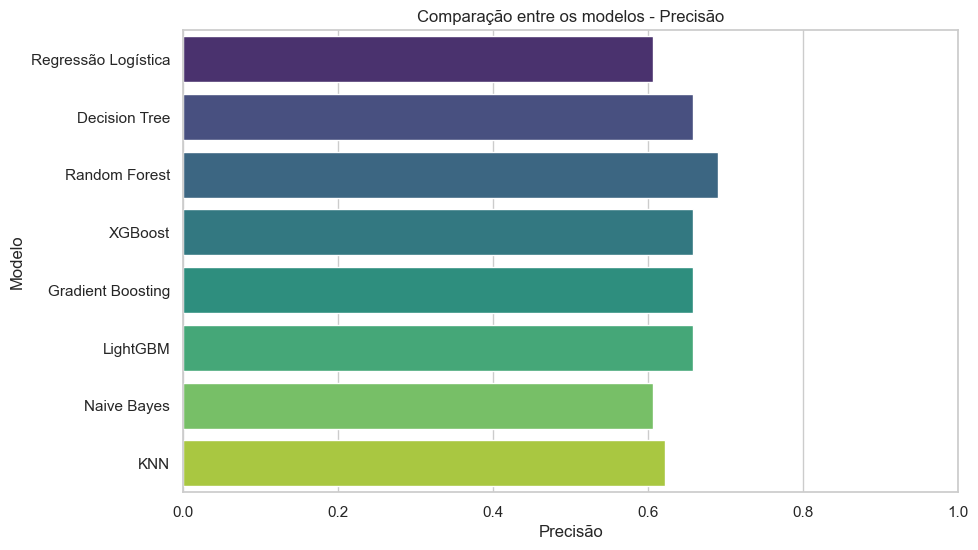

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\4024430171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = resultados, x = metric, y = 'Modelo', palette = 'viridis')


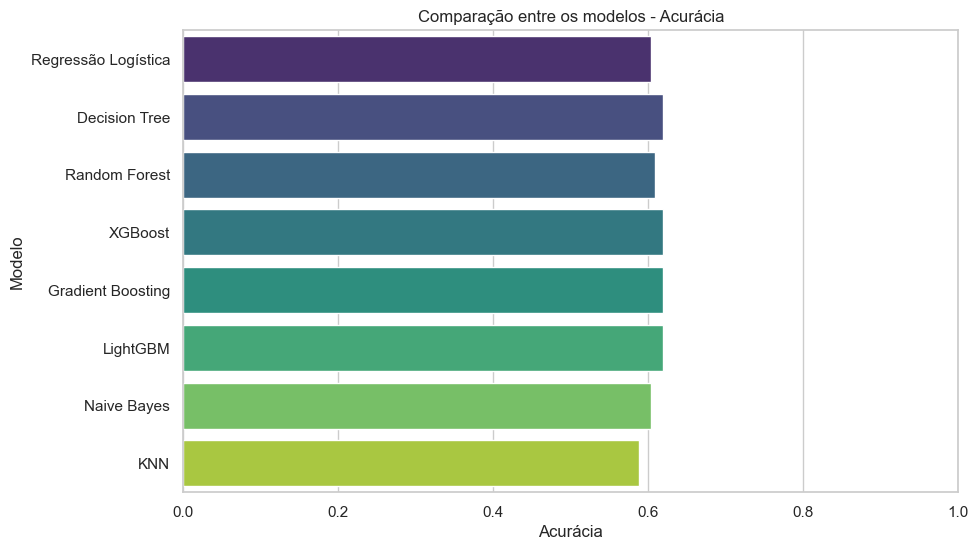

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\4024430171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = resultados, x = metric, y = 'Modelo', palette = 'viridis')


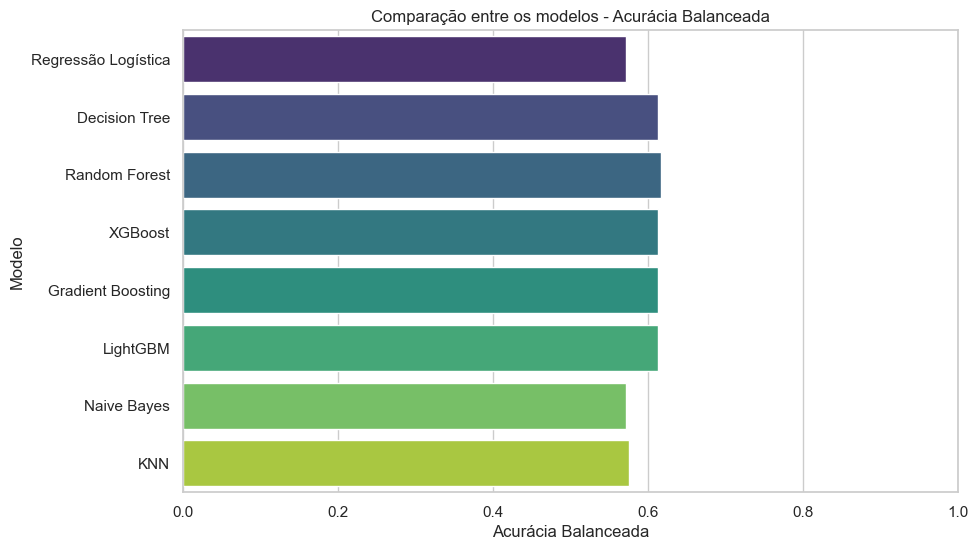

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\4024430171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = resultados, x = metric, y = 'Modelo', palette = 'viridis')


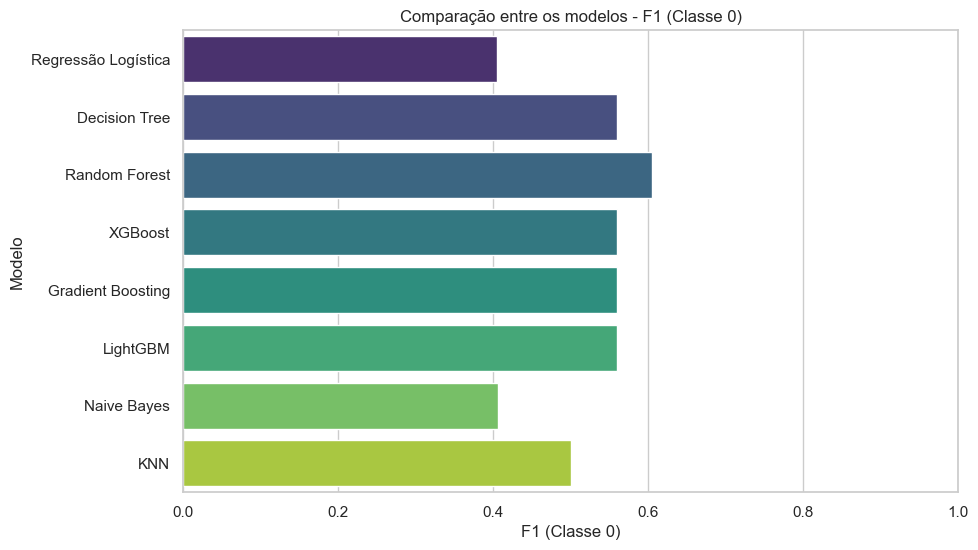

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\4024430171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = resultados, x = metric, y = 'Modelo', palette = 'viridis')


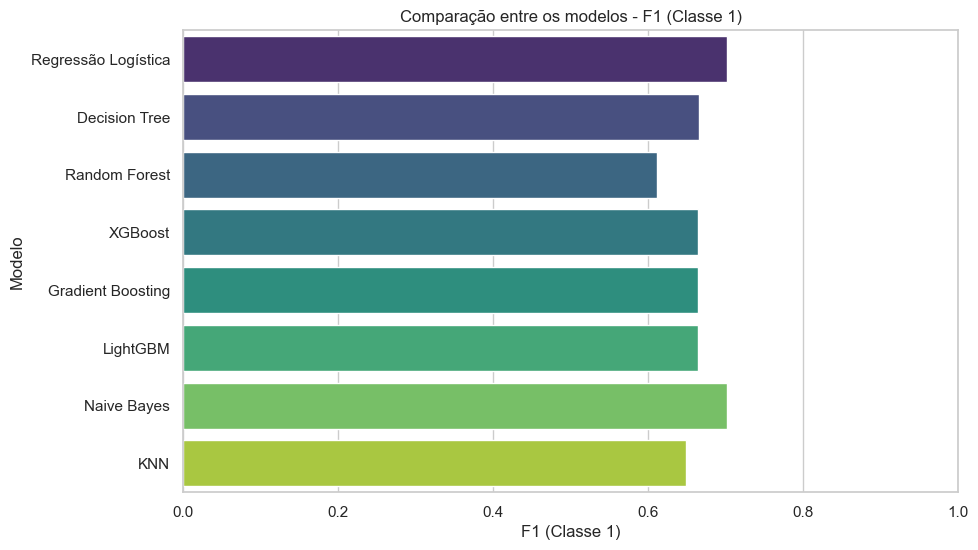

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\4024430171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = resultados, x = metric, y = 'Modelo', palette = 'viridis')


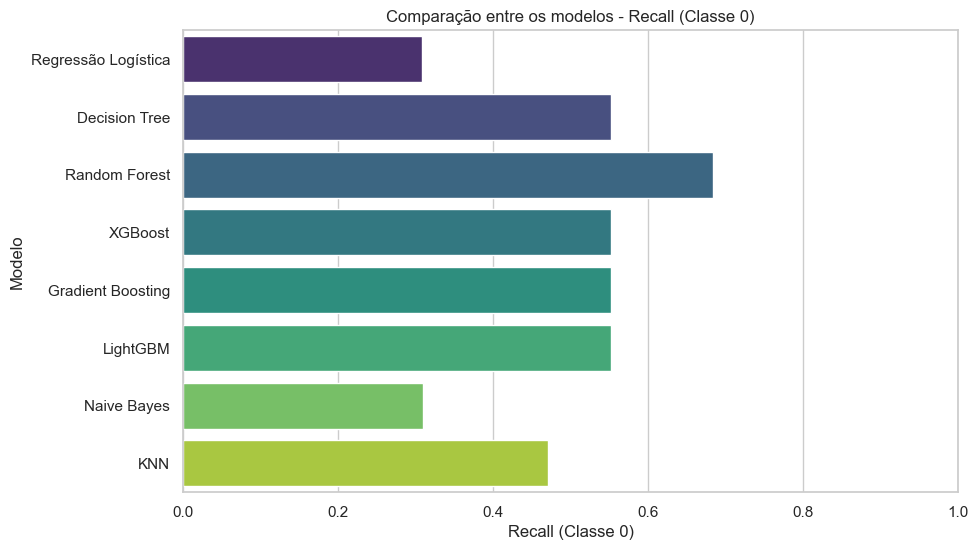

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\4024430171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = resultados, x = metric, y = 'Modelo', palette = 'viridis')


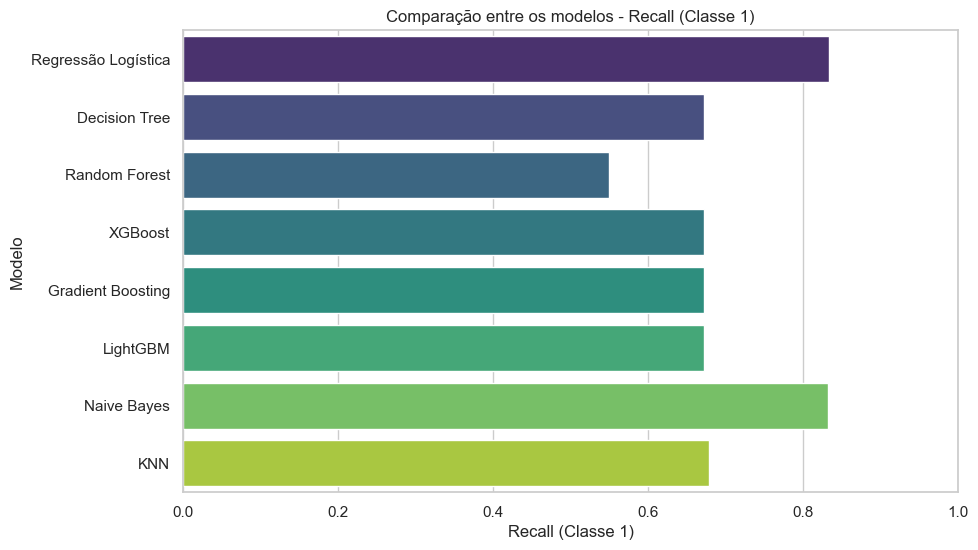

C:\Users\ricar\AppData\Local\Temp\ipykernel_20656\4024430171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = resultados, x = metric, y = 'Modelo', palette = 'viridis')


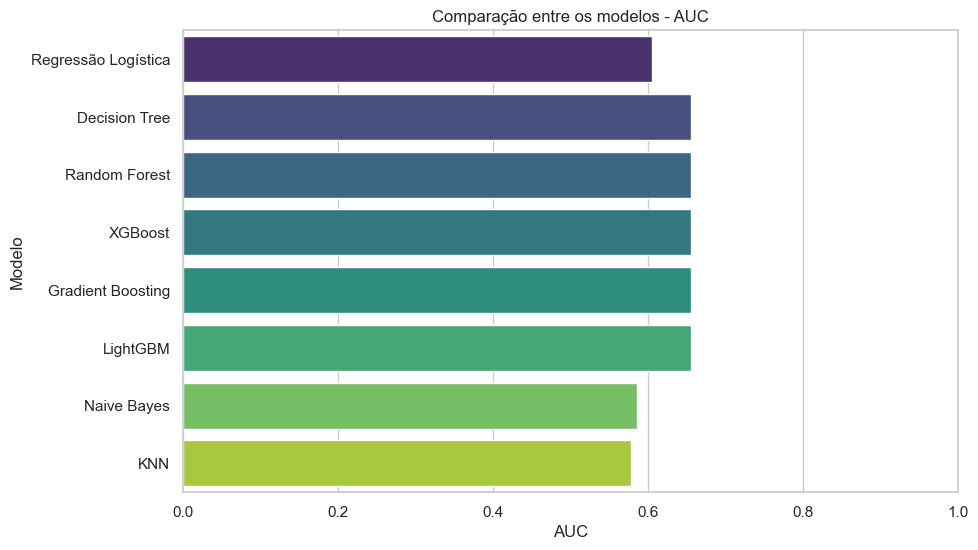

In [131]:
# Plota gráficos de barras para comparar as métricas de desempenho dos modelos

# Configura o estilo dos gráficos
sns.set_theme(style = 'whitegrid')

# Plota gráficos de barras para cada métrica de desempenho
for metric in resultados.columns[1:]:
    plt.figure(figsize = (10, 6))
    sns.barplot(data = resultados, x = metric, y = 'Modelo', palette = 'viridis')
    plt.title(f'Comparação entre os modelos - {metric}')
    plt.xlim(0, 1)
    plt.xlabel(metric)
    plt.ylabel('Modelo')
    plt.show()

### 6.2.2. Escolha do modelo

In [132]:
pay_1_metrics = resultados[['Modelo', 'AUC', 'F1 (Classe 1)', 'Recall (Classe 1)']].copy()

In [133]:
pay_1_metrics

,Modelo,AUC,F1 (Classe 1),Recall (Classe 1)
0,Regressão Logística,0.605443,0.702029,0.833331
1,Decision Tree,0.654858,0.664848,0.672491
2,Random Forest,0.654840,0.611934,0.549881
3,XGBoost,0.654829,0.664829,0.672491
4,Gradient Boosting,0.654825,0.664825,0.672467
5,LightGBM,0.654776,0.664821,0.672503
6,Naive Bayes,0.585767,0.701955,0.832555
7,KNN,0.578221,0.648685,0.678463


In [134]:
pay_0_metrics = resultados[['Modelo', 'AUC', 'F1 (Classe 0)', 'Recall (Classe 0)']].copy()

In [135]:
pay_0_metrics

,Modelo,AUC,F1 (Classe 0),Recall (Classe 0)
0,Regressão Logística,0.605443,0.405297,0.308335
1,Decision Tree,0.654858,0.559900,0.551667
2,Random Forest,0.654840,0.605164,0.683660
3,XGBoost,0.654829,0.559844,0.551590
4,Gradient Boosting,0.654825,0.559869,0.551636
5,LightGBM,0.654776,0.559803,0.551529
6,Naive Bayes,0.585767,0.406616,0.309848
7,KNN,0.578221,0.500678,0.471279


A comparação entre os modelos mostrou três perfis distintos de desempenho:  

- Os modelos de ensemble, como XGBoost, Gradient Boosting e LightGBM, apresentaram resultados muito semelhantes, com AUC em torno de 0.65, e recalls e F1-scores razoavelmente elevados, 0.6724 e 0.6725, respectivamente. Logo, são modelos que melhor estimam a probabilidade de pagamento, sendo indicados quando o objetivo é **estimar probabilidades de pagamento dadas as ações de cobrança**.
- Já os modelos de Regressão Logística e Naive Bayes se destacaram por apresentarem os maiores valores de recall e F1-score para a classe 1 (pagamento), com 0.8333 e 0.70, respectivamente, embora com valores de AUC inferiores. Esses modelos são mais indicados quando o foco está em **identificar o maior número possível de alunos que irão pagar**, mesmo que isso aumente o risco de prever como pagadores alguns alunos que não irão pagar (falsos positivos).
- No que tange a detecção de inadimplência, o modelo que apresentou melhor desempenho para a classe 0 foi a Random Forest, com o maior recall (0.68) e F1-score (0.60), seguido de perto pela Decision Tree, com recall de 0.55 e F1-score de 0.56. Esses modelos são mais indicados quando o foco é **identificar os alunos que não irão pagar**, mesmo que isso implique em prever como inadimplentes alguns alunos que irão pagar (falsos negativos).

### 6.2.3. Possíveis melhorias

A comparação entre os modelos mostrou que os desempenhos foram bastante semelhantes, especialmente entre os modelos de ensemble, como XGBoost, Gradient Boosting e LightGBM, todos com AUC em torno de 0.65, F1-score e recall da classe 1 (pagamento) próximos de 0.67. Isso pode indicar que a engenharia de features e a seleção de variáveis foram adequadas, mas que o modelo não conseguiu capturar padrões mais complexos nos dados.  
Além disso, o modelo KNN, apesar de ser robusto, apresentou desempenho inferior em comparação aos demais modelos, o que pode ser atribuído a sua sensibilidade a hiperparâmetros e à necessidade de normalização dos dados.  
Futuramente, poderiam ser benéficas, entre outras, as seguintes melhorias:
- Validação cruzada (cross-validation) para otimização de hiperparâmetros;
- SMOTE ou ADASYN para lidar com o desequilíbrio entre as classes;
- Ajuste do threshold de decisão para maximizar o recall da classe 1 (pagamento);
- Teste de outros algoritmos de classificação, como SVM e CatBoost;
- Teste de outras técnicas de engenharia de features, como PCA ou LDA, para redução de dimensionalidade;
- Teste de outras técnicas de seleção de variáveis, como LASSO ou Ridge, para identificar as variáveis mais relevantes.

## 6.3. Considerações finais

Podemos resumir os resultados acima da seguinte forma, levando em consideração a estratégia de negócio da empresa:

- Modelos de ensemble como **XGBoost**, **Gradient Boosting** e **LightGBM** são indicados para quando a empresa deseja trabalhar com estimativas consistentes de probabilidade, permitindo um melhor direcionamento das ações de cobrança.
- Se o objetivo for **otimizar as realizações de cobrança**, evitando contatos desnecessários com quem pagará naturalmente, deve-se priorizar modelos com alto recall e F1-score para a classe 1, como **Regressão Logística** ou **Naive Bayes**.
- Se o foco for **identificar inadimplência**, atuando sobre alunos com maior risco de não pagamento, **Random Forest** se mostra como a melhor alternativa.

# 6. Upgrade com IA (pronto para vídeo): Next Best Action + Explicabilidade + Simulação de Política

Nesta seção eu **não troco o problema por um “chatbot”**. Em vez disso, eu adiciono componentes de IA que fazem o projeto parecer **um sistema de apoio à decisão**:

- **Next Best Action**: dado um cenário (ex.: `dias_dif`), ranqueia as ações de cobrança por **probabilidade estimada de pagamento**.
- **Explicabilidade com SHAP**: explica *por que* uma ação recebeu score maior.
- **Simulação de política**: compara estratégias (custos x retorno esperado) para “parecer produto”.

> Observação: o dataset de teste traz apenas `acao_cobranca` e `dias_dif` como features de modelagem nesta versão.  
> Se futuramente você incluir mais contexto (valor, histórico do aluno, número de cobranças anteriores etc.), estas mesmas funções ficam ainda mais fortes.

In [137]:
# === 6.1 Dependências e checagem de dataset base ===
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import roc_auc_score, brier_score_loss, classification_report
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

# SHAP (explicabilidade)
import shap
shap.initjs()

# Se você rodar o notebook do zero, df_acoes_mensalidade já deve existir (foi criado nas seções anteriores).
# Mas, por segurança, este bloco reconstrói df_acoes_mensalidade caso necessário.
if 'df_acoes_mensalidade' not in globals():
    # Carrega os CSVs do repositório (paths relativos ao notebook)
    df_mensalidades = pd.read_csv('../dados/mensalidades_teste.csv')
    df_cobrancas = pd.read_csv('../dados/cobrancas_teste.csv')

    # Converte datas
    for col in ['data_competencia', 'data_vencimento', 'data_baixa']:
        df_mensalidades[col] = pd.to_datetime(df_mensalidades[col], errors='coerce')
    df_cobrancas['data_cobranca'] = pd.to_datetime(df_cobrancas['data_cobranca'], errors='coerce')

    # Alvo: 1 se houve baixa
    df_mensalidades['foi_pago'] = np.where(df_mensalidades['data_baixa'].isna(), 0, 1)

    # Bases para merge (mantém colunas relevantes)
    mensalidades_base = df_mensalidades[['id_aluno','data_vencimento','valor_cobrado','foi_pago']].copy()
    cobrancas_base = df_cobrancas[['id_aluno','acao_cobranca','data_cobranca']].copy()

    df_merged = pd.merge(mensalidades_base, cobrancas_base, on='id_aluno', how='inner')

    # Janela: cobranças até 10 dias após vencimento
    janela_cobranca = pd.Timedelta(days=10)
    df_merged = df_merged[df_merged['data_cobranca'] <= (df_merged['data_vencimento'] + janela_cobranca)].copy()

    df_merged['diferenca_data'] = (df_merged['data_cobranca'] - df_merged['data_vencimento']).abs()
    df_merged = df_merged.sort_values(by='diferenca_data')
    df_acoes_mensalidade = df_merged.drop_duplicates(subset=['id_aluno','data_cobranca','acao_cobranca']).copy()

    df_acoes_mensalidade['dias_dif'] = df_acoes_mensalidade['diferenca_data'].dt.days

df_acoes_mensalidade[['acao_cobranca','dias_dif','foi_pago']].head()

,acao_cobranca,dias_dif,foi_pago
2002602,e-mail,0,1
2169925,e-mail,0,0
3139598,e-mail,0,0
2169863,e-mail,0,0
3989977,e-mail,0,1


In [138]:
# === 6.2 Pipeline "mais profissional": ColumnTransformer + XGBoost + Calibração ===
# Por que calibrar?
# - Para "parecer produto": probabilidades bem calibradas são melhores para decisão (ranking de ações, custo x retorno etc.)

df_ai = df_acoes_mensalidade[['acao_cobranca','dias_dif','foi_pago']].copy()
df_ai = df_ai.dropna(subset=['acao_cobranca','dias_dif','foi_pago'])

X = df_ai[['acao_cobranca','dias_dif']]
y = df_ai['foi_pago'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=79
)

cat_features = ['acao_cobranca']
num_features = ['dias_dif']

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='drop'
)

# scale_pos_weight ajuda quando a classe positiva é minoritária
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = (neg / max(pos, 1))

xgb = XGBClassifier(
    n_estimators=600,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    min_child_weight=1,
    gamma=0.0,
    random_state=79,
    eval_metric='logloss',
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

base_model = Pipeline(steps=[
    ('prep', preprocess),
    ('model', xgb)
])

# Calibração (sigmoid = Platt scaling)
calibrated_model = CalibratedClassifierCV(base_model, method='sigmoid', cv=3)
calibrated_model.fit(X_train, y_train)

proba_test = calibrated_model.predict_proba(X_test)[:, 1]

print("AUC (teste):", round(roc_auc_score(y_test, proba_test), 4))
print("Brier score (teste):", round(brier_score_loss(y_test, proba_test), 4))
print("\nRelatório (threshold=0.5):\n", classification_report(y_test, (proba_test>=0.5).astype(int)))

AUC (teste): 0.6548
Brier score (teste): 0.2284

Relatório (threshold=0.5):
               precision    recall  f1-score   support

           0       0.57      0.55      0.56     65458
           1       0.66      0.67      0.66     83729

    accuracy                           0.62    149187
   macro avg       0.61      0.61      0.61    149187
weighted avg       0.62      0.62      0.62    149187



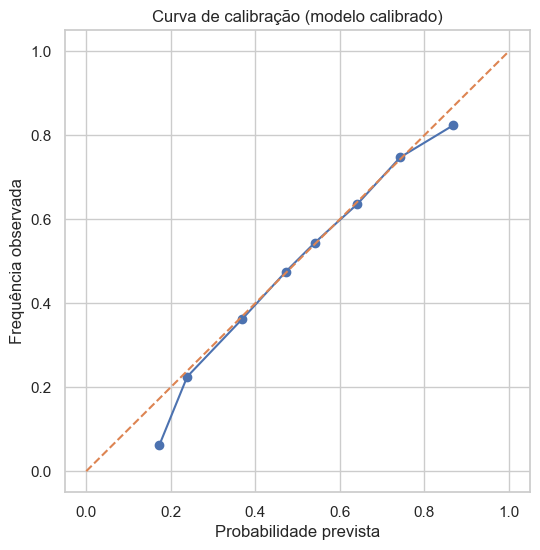

In [139]:
# === 6.3 Curva de calibração (útil para vídeo/“produto”) ===
import matplotlib.pyplot as plt

prob_true, prob_pred = calibration_curve(y_test, proba_test, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Curva de calibração (modelo calibrado)')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Frequência observada')
plt.show()

In [148]:
# === 6.4 Next Best Action: ranqueia ações para um mesmo cenário de dias_dif ===

# Lista de ações conhecidas no dataset
acoes_disponiveis = sorted(df_ai['acao_cobranca'].unique().tolist())

def recomendar_acoes(dias_dif: int, valor_mensalidade = None, custos=None, top_k: int = 5):
    '''
    Retorna um ranking de ações por:
    - probabilidade de pagamento prevista (modelo calibrado)
    - e (opcional) retorno esperado: p * valor_mensalidade - custo_acao
    '''
    if custos is None:
        custos = {
            'e-mail': 0.02,
            'SMS': 0.05,
            'whatsapp': 0.10,
            'ligação telefônica': 1.50,
            'negativação': 10.0
        }

    df_scen = pd.DataFrame({
        'acao_cobranca': acoes_disponiveis,
        'dias_dif': dias_dif
    })

    df_scen['p_pagamento'] = calibrated_model.predict_proba(df_scen)[:, 1]

    if valor_mensalidade is not None:
        df_scen['custo'] = df_scen['acao_cobranca'].map(custos).fillna(0.0)
        df_scen['expected_return'] = (
            df_scen['p_pagamento'] * valor_mensalidade - df_scen['custo']
        )

    return df_scen.sort_values('p_pagamento', ascending=False).head(top_k)
    # Monte um DF com uma linha por ação
    df_scen = pd.DataFrame({
        'acao_cobranca': acoes_disponiveis,
        'dias_dif': [dias_dif] * len(acoes_disponiveis)
    })

    p = calibrated_model.predict_proba(df_scen)[:, 1]
    df_scen['p_pagamento'] = p

    # retorno esperado, se valor_mensalidade for fornecido
    if valor_mensalidade is not None:
        df_scen['custo'] = df_scen['acao_cobranca'].map(custos).fillna(0.0)
        df_scen['retorno_esperado'] = df_scen['p_pagamento'] * valor_mensalidade - df_scen['custo']

    df_scen = df_scen.sort_values(by='p_pagamento', ascending=False).head(top_k)
    return df_scen.reset_index(drop=True)

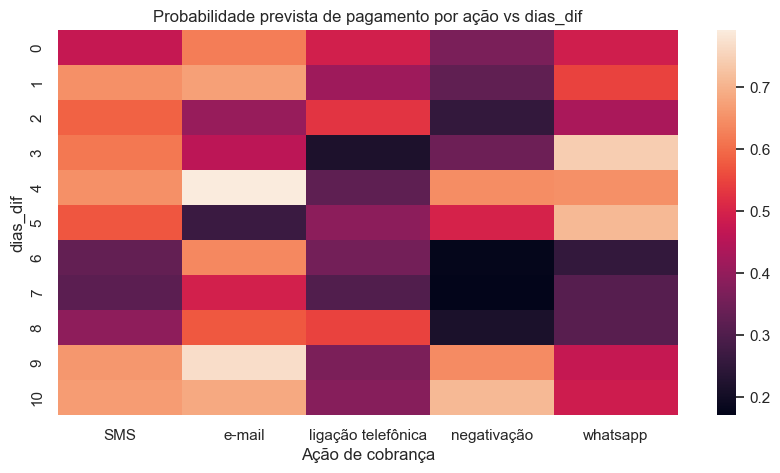

,SMS,e-mail,ligação telefônica,negativação,whatsapp
0,0.471623,0.623882,0.491638,0.363042,0.488812
1,0.649325,0.672112,0.413817,0.323564,0.548534
2,0.587242,0.403683,0.529521,0.253709,0.432125
3,0.616668,0.458433,0.217150,0.342863,0.742049
4,0.649904,0.791981,0.322925,0.644580,0.650228


In [141]:
# === 6.5 “Cena de vídeo”: tabela para vários dias_dif (heatmap de probabilidades) ===
import seaborn as sns

dias_grid = list(range(0, 11))  # 0 a 10 dias
mat = []
for d in dias_grid:
    rank = recomendar_acoes(dias_dif=d, valor_mensalidade=None, top_k=len(acoes_disponiveis))
    # reordena no índice original de ações
    row = rank.set_index('acao_cobranca').reindex(acoes_disponiveis)['p_pagamento'].values
    mat.append(row)

heat = pd.DataFrame(mat, index=dias_grid, columns=acoes_disponiveis)

plt.figure(figsize=(10, 5))
sns.heatmap(heat, annot=False)
plt.title('Probabilidade prevista de pagamento por ação vs dias_dif')
plt.xlabel('Ação de cobrança')
plt.ylabel('dias_dif')
plt.show()

heat.head()

Exemplo explicado:
              acao_cobranca  dias_dif
3825533  ligação telefônica         2
Probabilidade prevista de pagamento: 0.5295


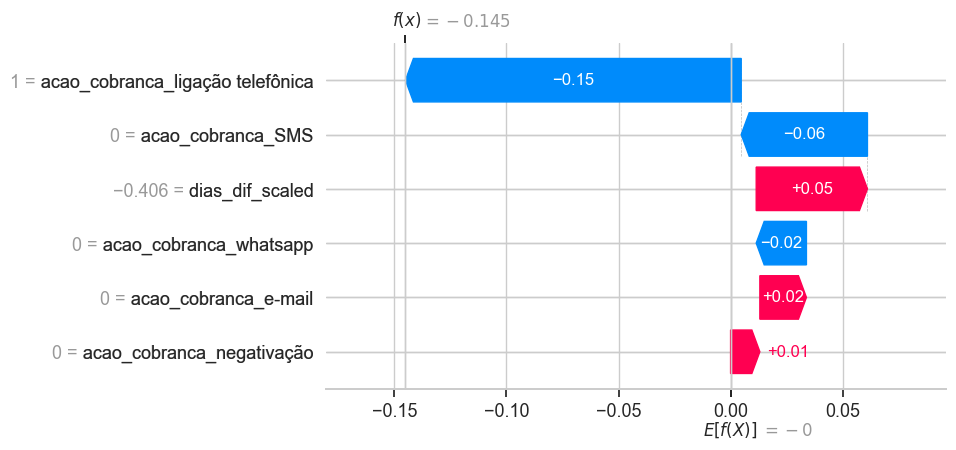

In [142]:
# === 6.6 Explicabilidade com SHAP (por que esta ação recebeu este score?) ===
# Para SHAP com pipeline:
# - pegamos o pipeline interno (prep + model)
# - explicamos no espaço transformado (após OHE + scaler)

# Extrai o estimador base treinado dentro do calibrador
# CalibratedClassifierCV armazena os modelos em calibrated_model.calibrated_classifiers_
# Cada um tem base_estimator_ (pipeline já fitado)
base_pipeline = calibrated_model.calibrated_classifiers_[0].estimator

prep = base_pipeline.named_steps['prep']
xgb_fitted = base_pipeline.named_steps['model']

# Transforma X_test
X_test_trans = prep.transform(X_test)

# Obtem nomes das features transformadas
ohe = prep.named_transformers_['cat']
cat_names = ohe.get_feature_names_out(['acao_cobranca'])
num_names = np.array(['dias_dif_scaled'])
feat_names = np.concatenate([num_names, cat_names])

# Cria explicador SHAP para modelo tree-based
explainer = shap.TreeExplainer(xgb_fitted)
shap_values = explainer.shap_values(X_test_trans)

# Escolhe um exemplo do teste para explicar
idx = 0
x_row = X_test.iloc[[idx]].copy()
proba = calibrated_model.predict_proba(x_row)[:,1][0]

print("Exemplo explicado:")
print(x_row)
print("Probabilidade prevista de pagamento:", round(float(proba), 4))

# Waterfall plot (mostra contribuições)
shap.plots.waterfall(
    shap.Explanation(values=shap_values[idx], base_values=explainer.expected_value, data=X_test_trans[idx], feature_names=feat_names)
)

In [143]:
# === 6.7 Explicação em linguagem natural ===
# Aqui a ideia é gerar um resumo "produto": top fatores que aumentam/diminuem o score.

def explicar_predicao_natural(idx: int = 0, top_n: int = 6):
    vals = shap_values[idx]
    contrib = pd.DataFrame({
        'feature': feat_names,
        'contrib': vals
    })
    contrib['abs'] = contrib['contrib'].abs()
    contrib = contrib.sort_values('abs', ascending=False).head(top_n)

    positivos = contrib[contrib['contrib'] > 0].head(top_n)
    negativos = contrib[contrib['contrib'] < 0].head(top_n)

    lines = []
    if len(positivos):
        lines.append("Principais fatores que **aumentam** a probabilidade:")
        for _,r in positivos.iterrows():
            lines.append(f"- {r['feature']}: +{r['contrib']:.3f}")
    if len(negativos):
        lines.append("\nPrincipais fatores que **reduzem** a probabilidade:")
        for _,r in negativos.iterrows():
            lines.append(f"- {r['feature']}: {r['contrib']:.3f}")

    return "\n".join(lines)

print(explicar_predicao_natural(idx=0, top_n=8))

Principais fatores que **aumentam** a probabilidade:
- dias_dif_scaled: +0.050
- acao_cobranca_e-mail: +0.021
- acao_cobranca_negativação: +0.013

Principais fatores que **reduzem** a probabilidade:
- acao_cobranca_ligação telefônica: -0.150
- acao_cobranca_SMS: -0.056
- acao_cobranca_whatsapp: -0.022


In [156]:
# === 6.8 Simulação de política (custo x retorno esperado) ===
# Demonstração simples: para cada dias_dif, escolha a ação que maximiza retorno esperado.
# (Você pode sofisticar isso depois: restrições, orçamentos, limites por canal, etc.)

VALOR_MENSALIDADE_DEMO = 500.0  # configurable business parameter

custos_demo = {
    'e-mail': 0.02,
    'SMS': 0.05,
    'whatsapp': 0.10,
    'ligação telefônica': 1.50,
    'negativação': 10.0
}

VALOR_MENSALIDADE_DEMO = 500.0

custos_demo = {
    'e-mail': 0.02,
    'SMS': 0.05,
    'whatsapp': 0.10,
    'ligação telefônica': 1.50,
    'negativação': 10.0
}

def melhor_acao_por_retorno(dias_dif: int, valor_mensalidade: float):
    df_rank = recomendar_acoes(
        dias_dif=dias_dif,
        valor_mensalidade=valor_mensalidade,
        custos=custos_demo,
        top_k=len(acoes_disponiveis)
    )

    # Detect which expected-return column exists
    if 'retorno_esperado' in df_rank.columns:
        col_ret = 'retorno_esperado'
    elif 'expected_return' in df_rank.columns:
        col_ret = 'expected_return'
    else:
        raise ValueError(
            "Expected return column not found. "
            "Make sure recomendar_acoes() is called with valor_mensalidade != None "
            "and that it creates 'retorno_esperado' (or 'expected_return'). "
            f"Columns found: {list(df_rank.columns)}"
        )

    df_rank = df_rank.sort_values(col_ret, ascending=False).reset_index(drop=True)
    best = df_rank.iloc[0].copy()
    best['retorno_col'] = col_ret  # just to show which column was used
    return best

pol = pd.DataFrame([melhor_acao_por_retorno(d, VALOR_MENSALIDADE_DEMO) for d in range(0, 11)])
pol

,acao_cobranca,dias_dif,p_pagamento,custo,expected_return,retorno_col
0,e-mail,0,0.623882,0.02,311.920998,expected_return
0,e-mail,1,0.672112,0.02,336.036046,expected_return
0,SMS,2,0.587242,0.05,293.571048,expected_return
0,whatsapp,3,0.742049,0.10,370.924400,expected_return
0,e-mail,4,0.791981,0.02,395.970589,expected_return
0,whatsapp,5,0.710913,0.10,355.356595,expected_return
0,e-mail,6,0.637080,0.02,318.520125,expected_return
0,e-mail,7,0.493508,0.02,246.733963,expected_return
0,e-mail,8,0.573939,0.02,286.949419,expected_return
0,e-mail,9,0.768828,0.02,384.393758,expected_return


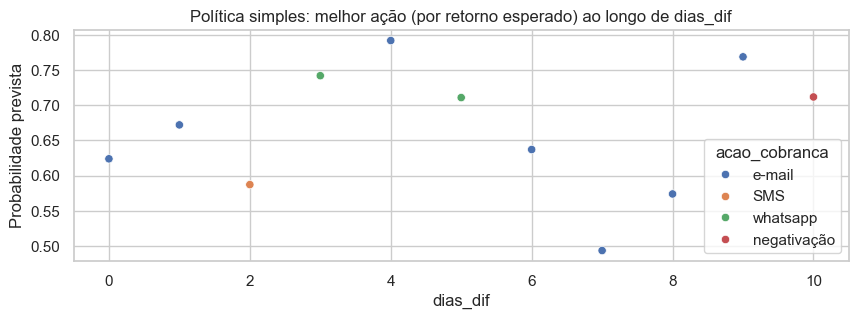

In [154]:
# Visualização rápida da política escolhida
plt.figure(figsize=(10, 3))
sns.scatterplot(data=pol, x='dias_dif', y='p_pagamento', hue='acao_cobranca')
plt.title('Política simples: melhor ação (por retorno esperado) ao longo de dias_dif')
plt.xlabel('dias_dif')
plt.ylabel('Probabilidade prevista')
plt.show()